# Supervised learning (nadgledano učenje)

In [148]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [150]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any()
df.dropna().reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Dataset nema duplikata ni nedostajućih vrednosti

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| PM2.5 (µg/m³)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

## Kvalitet vazduha
* Dobar: Čist vazduh sa niskim nivoima zagađenja 
* Umeren: Prihvatljiv kvalitet vazduha, ali su prisutni neki zagađivači
* Loš: Uočljivo zagađenje koje može izazvati zdravstvene probleme kod osetljivih grupa
* Opasan: Veoma zagađen vazduh koji predstavlja ozbiljan zdravstveni rizik za populaciju

In [151]:
df = df.rename(columns={
    'Temperature':'Temperatura',
    'Humidity':'Vlažnost',
    'Air Quality': 'Kvalitet_Vazduha',
    'Proximity_to_Industrial_Areas': 'Blizina_Industrije',
    'Population_Density':'Gustina_Populacije'
})
df['Kvalitet_Vazduha'] = df['Kvalitet_Vazduha'].replace({
    'Good': 'Dobar',
    'Moderate': 'Umeren',
    'Poor': 'Loš',
    'Hazardous': 'Opasan'
})

if df['Kvalitet_Vazduha'].dtype == 'object': 
    encoder = LabelEncoder()
    df['Kvalitet_Vazduha'] = encoder.fit_transform(df['Kvalitet_Vazduha'])
df.head()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [152]:
class_mapping = {i: class_name for i, class_name in enumerate(encoder.classes_)}
print(class_mapping)

{0: 'Dobar', 1: 'Loš', 2: 'Opasan', 3: 'Umeren'}


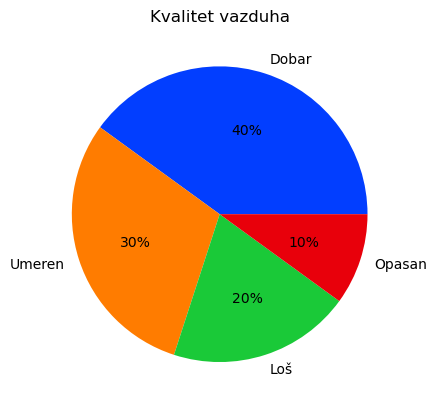

In [153]:
air_quality=df['Kvalitet_Vazduha'].value_counts()
palette_color = seaborn.color_palette('bright') 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Kvalitet vazduha") 
plt.show() 

<Axes: >

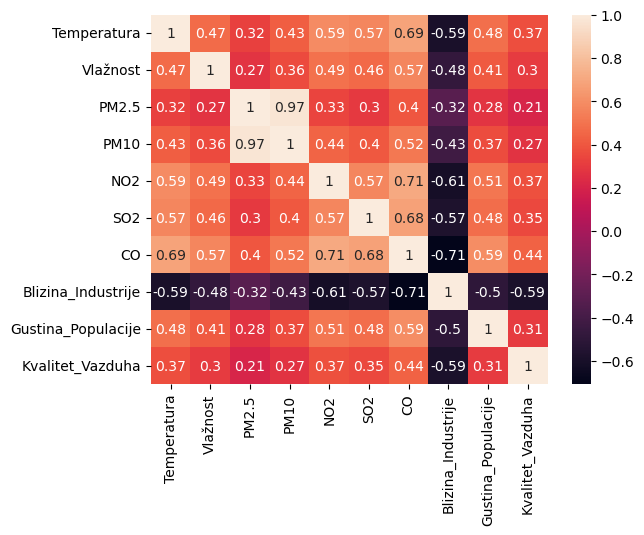

In [154]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

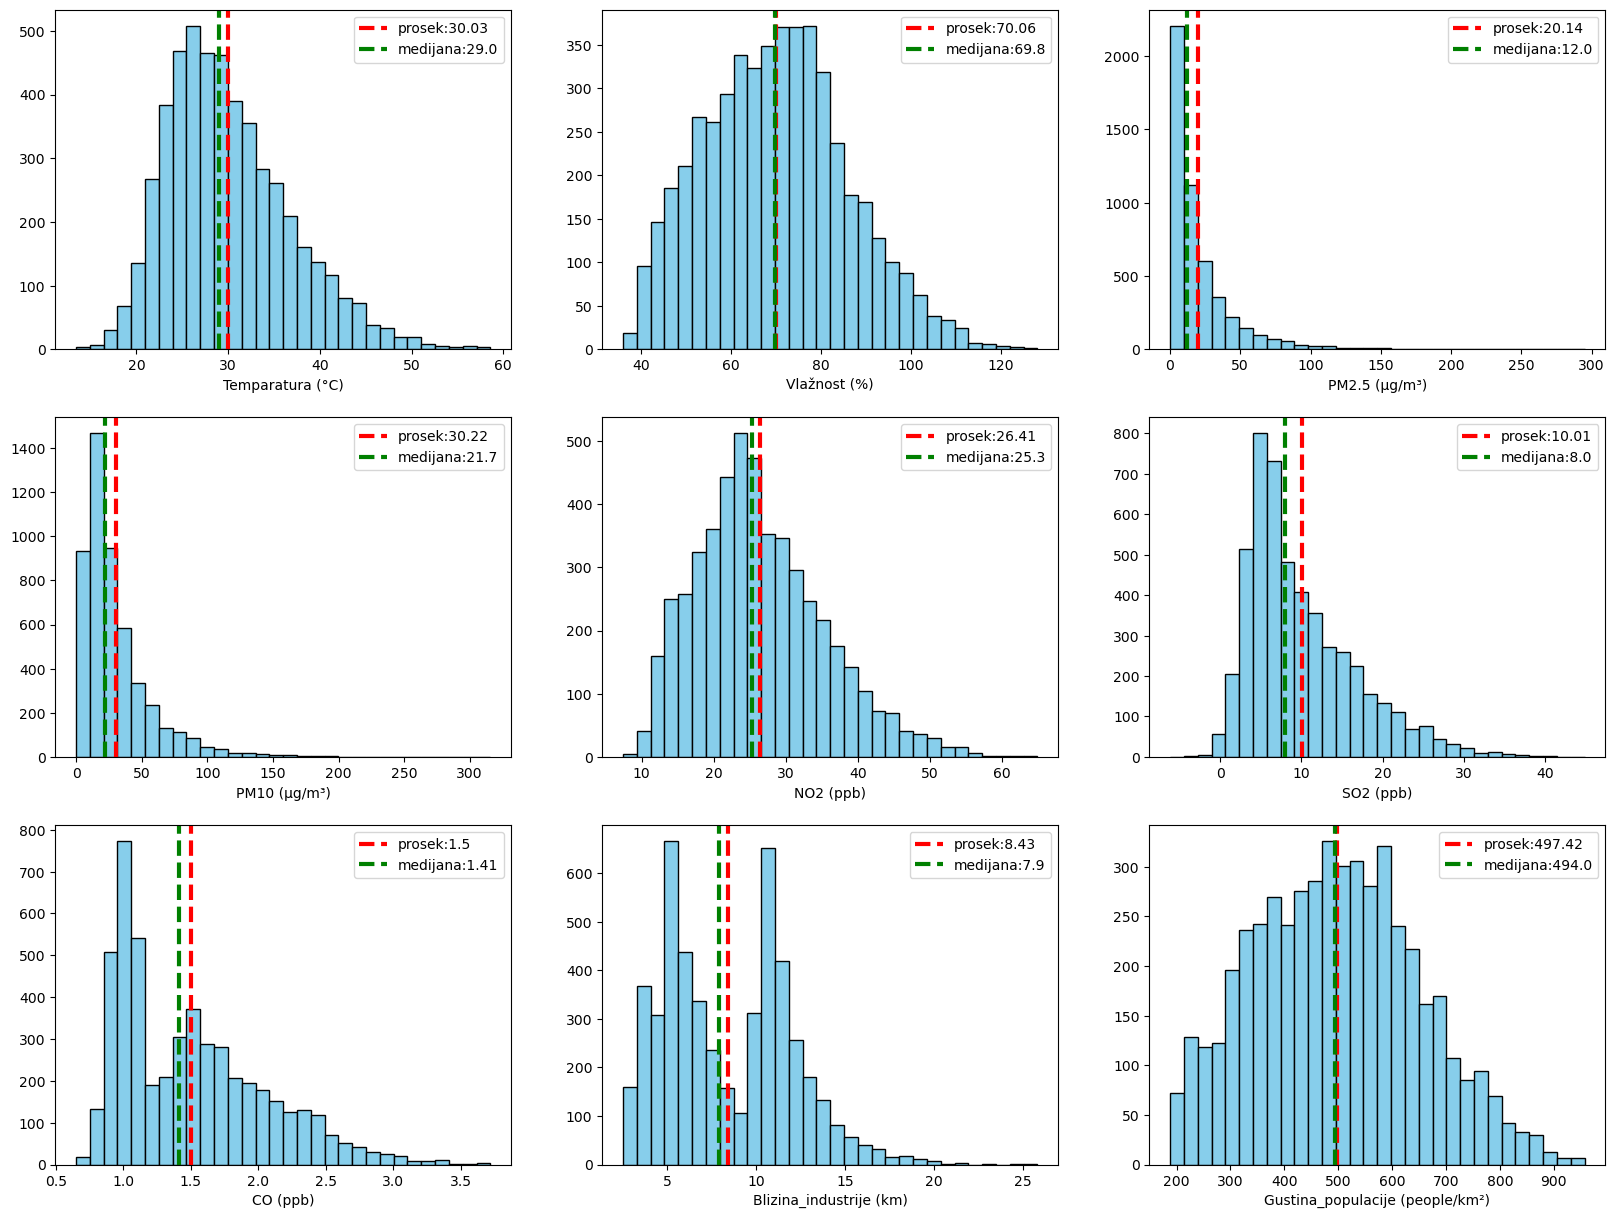

In [155]:
df_simpl=df.drop(columns='Kvalitet_Vazduha')
labels={'Temperatura':'Temparatura (°C)','Vlažnost':'Vlažnost (%)','PM2.5':'PM2.5 (µg/m³)',
        'PM10':'PM10 (µg/m³)','NO2':'NO2 (ppb)', 'SO2':'SO2 (ppb)','CO':'CO (ppb)',
        'Blizina_Industrije':'Blizina_industrije (km)','Gustina_Populacije':'Gustina_populacije (people/km²)',}
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(labels[col])
    plt.legend([f'prosek:{np.round(df[col].mean(),2)}',f'medijana:{np.round(df[col].median(),2)}'])
plt.show()

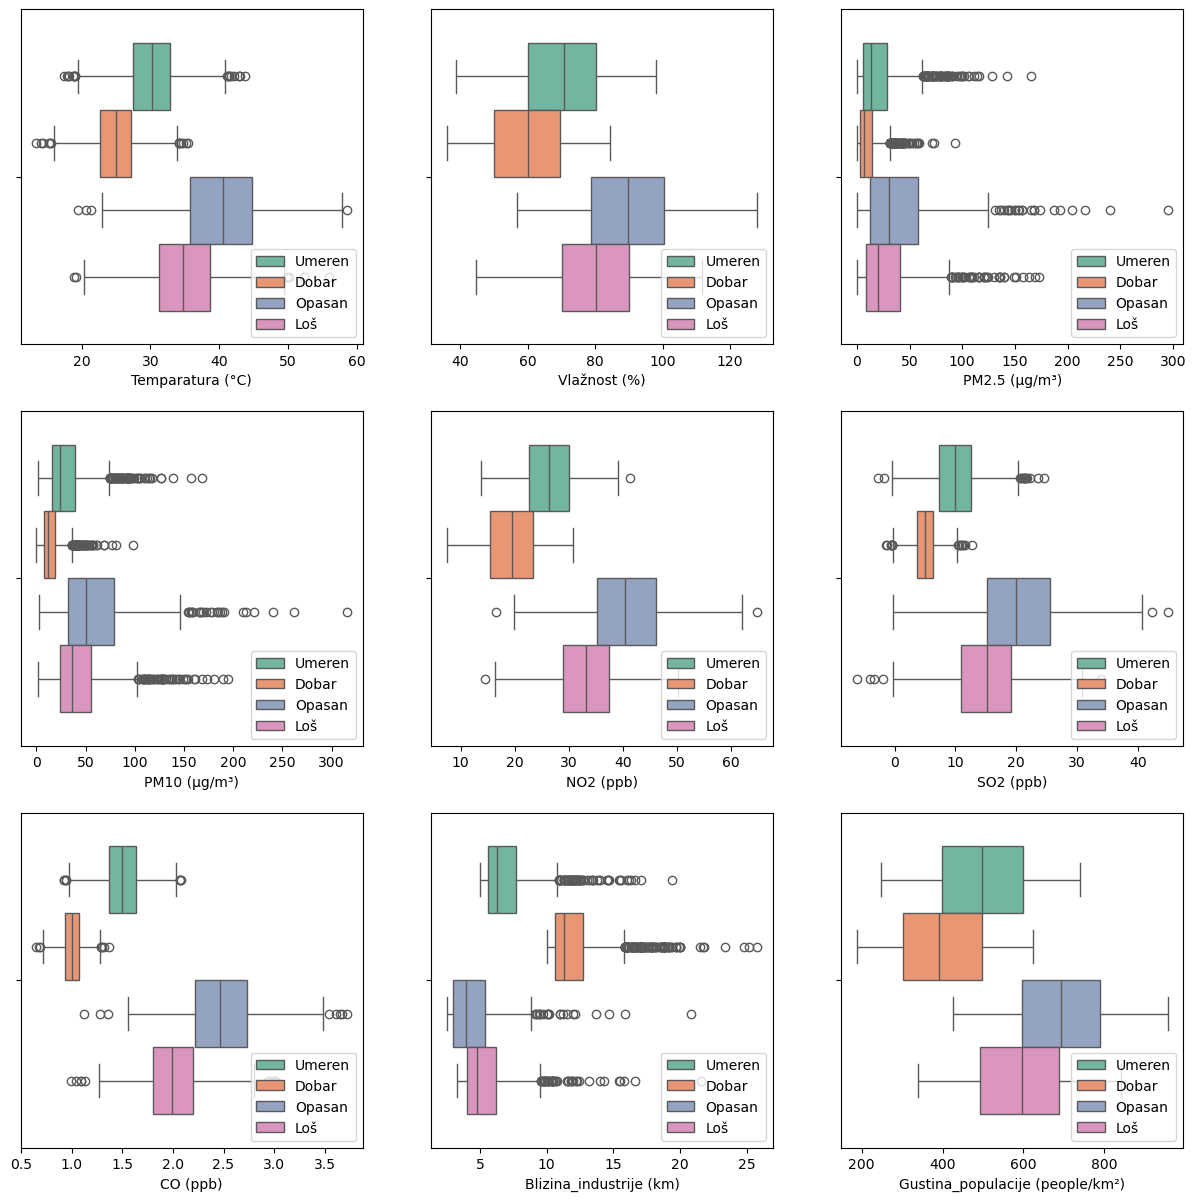

In [156]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.drop('Kvalitet_Vazduha', axis=1).columns):
  plt.subplot(4,3,i+1)
  seaborn.boxplot(x = df[col],hue=encoder.inverse_transform(df['Kvalitet_Vazduha']),palette='Set2')
  plt.xlabel(labels[col])
  plt.legend(loc='lower right')

#### Outlier removal (IQR)

In [157]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.268985
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,3.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [158]:
counts = df['Kvalitet_Vazduha'].value_counts().sort_index()
decoded_index = [encoder.classes_[i] for i in counts.index]
counts.index = decoded_index
print(counts)

Dobar     2000
Loš       1000
Opasan     500
Umeren    1500
Name: count, dtype: int64


In [159]:
df_encoded = df.copy()

encoded_labels = encoder.transform(['Dobar', 'Umeren'])

df_filtered = df_encoded[df_encoded['Kvalitet_Vazduha'].isin(encoded_labels)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         3500 non-null   float64
 1   Vlažnost            3500 non-null   float64
 2   PM2.5               3500 non-null   float64
 3   PM10                3500 non-null   float64
 4   NO2                 3500 non-null   float64
 5   SO2                 3500 non-null   float64
 6   CO                  3500 non-null   float64
 7   Blizina_Industrije  3500 non-null   float64
 8   Gustina_Populacije  3500 non-null   int64  
 9   Kvalitet_Vazduha    3500 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 287.1 KB


In [160]:
encoded_labels = encoder.transform(['Dobar', 'Umeren'])

df_filtered = df[df['Kvalitet_Vazduha'].isin(encoded_labels)]
df_original=df[~df['Kvalitet_Vazduha'].isin(encoded_labels)]

for col in df_filtered.columns:
    Q1=np.quantile(df_filtered[col],0.25)
    Q3=np.quantile(df_filtered[col],0.75)
    IQR=Q3-Q1
    low_lim=Q1-IQR*1.5
    up_lim=Q3+IQR*1.5
    df_filtered=df_filtered[(df_filtered[col]>=low_lim)&(df_filtered[col]<=up_lim)]

for part, name in zip([df_filtered, df_original], ['Filtered', 'Original']):
    counts = part['Kvalitet_Vazduha'].value_counts().sort_index()
    decoded_index = encoder.inverse_transform(counts.index)
    counts.index = decoded_index
    print(f"{name} counts:\n{counts}\n")

df = pd.concat([df_filtered, df_original], ignore_index=True)

df.info()

Filtered counts:
Dobar     1950
Umeren    1124
Name: count, dtype: int64

Original counts:
Loš       1000
Opasan     500
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         4574 non-null   float64
 1   Vlažnost            4574 non-null   float64
 2   PM2.5               4574 non-null   float64
 3   PM10                4574 non-null   float64
 4   NO2                 4574 non-null   float64
 5   SO2                 4574 non-null   float64
 6   CO                  4574 non-null   float64
 7   Blizina_Industrije  4574 non-null   float64
 8   Gustina_Populacije  4574 non-null   int64  
 9   Kvalitet_Vazduha    4574 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 339.6 KB


In [14]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,4574.000000,4574.000000,4574.000000,4574.00000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000
mean,30.035724,70.195562,18.187648,28.26655,26.499191,9.937429,1.505682,8.467337,497.675776,1.174464
std,6.852817,16.100012,23.396596,26.54155,9.156225,6.874975,0.565051,3.579890,155.880639,1.220029
min,15.300000,36.000000,0.000000,-0.20000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,24.900000,58.300000,4.300000,11.80000,19.800000,5.000000,1.020000,5.300000,379.000000,0.000000
50%,28.900000,69.950000,11.000000,20.60000,25.200000,7.800000,1.390000,8.350000,494.000000,1.000000
75%,34.100000,80.400000,22.675000,34.20000,32.300000,13.600000,1.887500,11.100000,601.000000,2.000000
max,58.600000,128.100000,295.000000,315.80000,64.900000,44.900000,3.720000,21.600000,957.000000,3.000000


#### Pomoćne funkcije

In [15]:
from sklearn.metrics import confusion_matrix
from IPython.display import display_html

def createConfusionMatrix(target_test,target_predicted,show_plot:bool=True):
    matrix = confusion_matrix(np.asarray(target_test),np.asarray(target_predicted))
    class_names=encoder.inverse_transform([0,1,2,3])
    dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)
    if show_plot:   
        seaborn.heatmap(data=dataframe,annot=True,cbar=None,cmap='Blues',fmt='.0f')
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.ylabel("True class")
        plt.xlabel("Predicted class")
        plt.show()
    return dataframe

def createTableReport(report_dict:dict):
    accuracy = report_dict.pop('accuracy')
    df_report = pd.DataFrame(report_dict).transpose()
    
    accuracy_row = pd.Series({'precision': None, 'recall': None, 'f1-score': accuracy, 'support': None}, name='accuracy')
    df_report = pd.concat([df_report, accuracy_row.to_frame().transpose()])
    df_report.round(4)

    return df_report

def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html()
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

## Ispitivanje različitih modela 

Modifikacija početnog dataset-a koristeći MinMax i Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = df.drop('Kvalitet_Vazduha', axis=1)

# StandardScaler
df_std = pd.DataFrame(StandardScaler().fit_transform(features), columns=features.columns, index=features.index)
df_std['Kvalitet_Vazduha'] = df['Kvalitet_Vazduha']

# MinMaxScaler
df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(features), columns=features.columns, index=features.index)
df_minmax['Kvalitet_Vazduha'] = df['Kvalitet_Vazduha']

datasets = [
    ("Original", df),
    ("Standard Scaled", df_std),
    ("MinMax Scaled", df_minmax)
]

### Dummy Classification

,precision,recall,f1-score,support
Dobar,0.401163,0.424180,0.412351,488.0
Loš,0.216667,0.208000,0.212245,250.0
Opasan,0.095238,0.080000,0.086957,125.0
Umeren,0.240283,0.241993,0.241135,281.0
macro avg,0.238338,0.238543,0.238172,1144.0
weighted avg,0.287901,0.294580,0.291011,1144.0
accuracy,NaN,NaN,0.294580,NaN


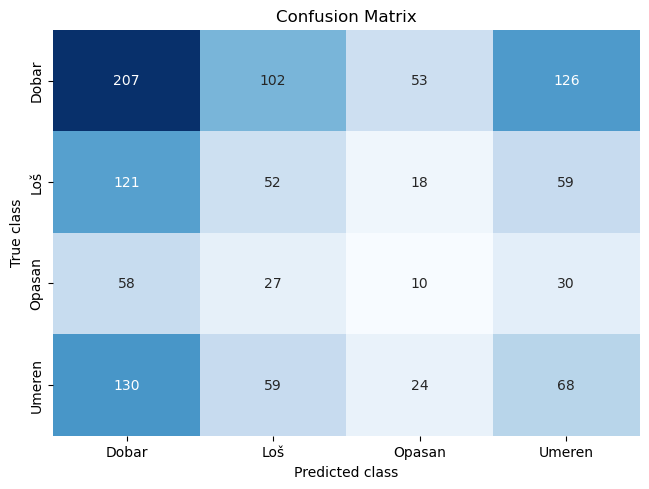

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) #train_size 0.25
dummy=DummyClassifier(strategy='stratified',random_state=0)
target_predicted=dummy.fit(features_train,target_train).predict(features_test)

report_dummy = createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_dummy)
conf_matrix_dummy=createConfusionMatrix(target_test,target_predicted)

* Preciznost, odziv i F1 su veoma niski za sve klase skupa podataka
* Veliki broj pogrešno identifikovanih klasa, uz nagađenje da nijedna predikcija za klasu "Opasan" nije bila tačna
* *Zaključak:* Ne koristiti ovaj model, služi samo kao standard za poređenje

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

reports_lg = []
conf_matrixs_lr = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = LogisticRegression(solver='saga', max_iter=5000, class_weight='balanced', random_state=0)
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_lr.append((name,conf_matrix))
    reports_lg.append(report)

In [19]:
showReports(dfs=reports_lg,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.973843,0.991803,0.982741,488.0
Loš,0.606965,0.488000,0.541020,250.0
Opasan,0.520000,0.728000,0.606667,125.0
Umeren,0.811808,0.782918,0.797101,281.0
macro avg,0.728154,0.747680,0.731882,1144.0
weighted avg,0.804279,0.801573,0.799521,1144.0
accuracy,NaN,NaN,0.801573,NaN
,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.883117,0.816000,0.848233,250.0


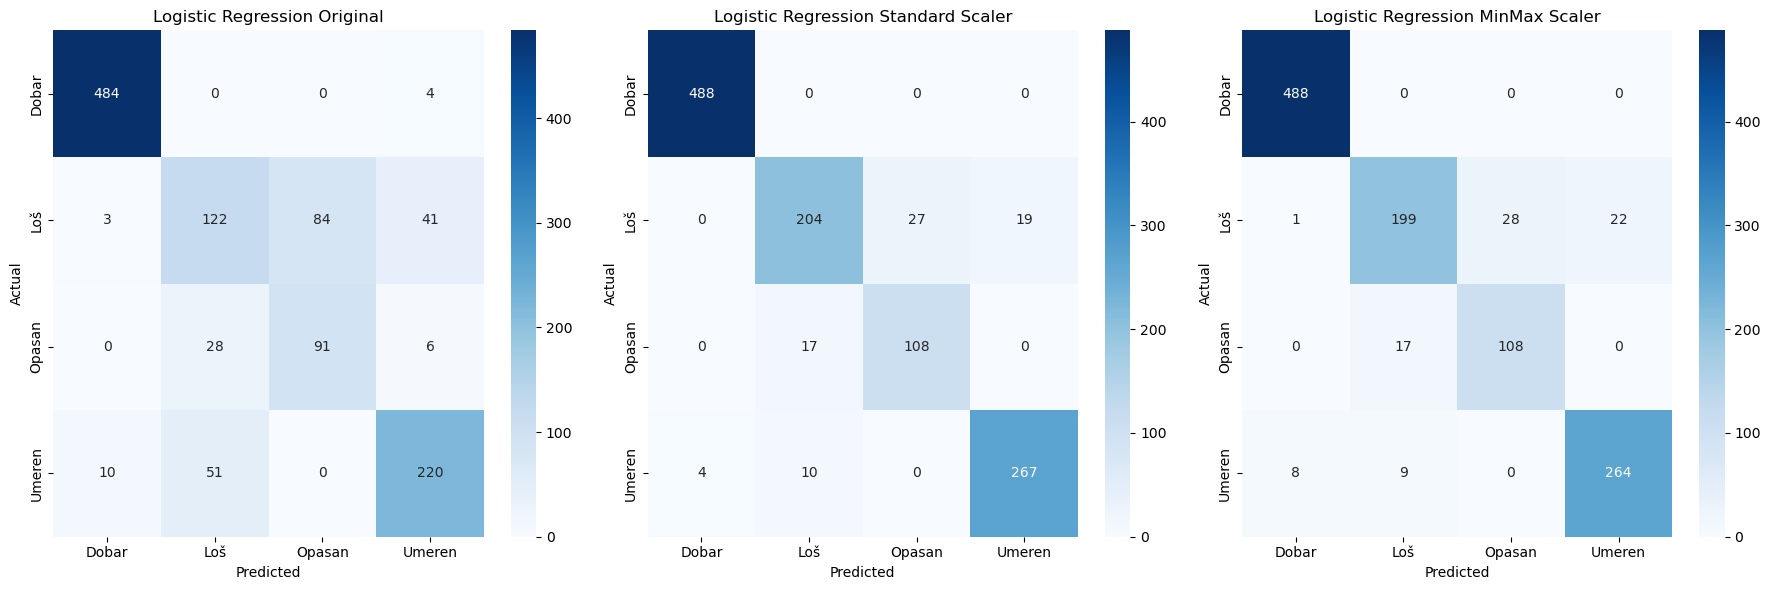

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Logistic Regression Original", "Logistic Regression Standard Scaler", "Logistic Regression MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_lr)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_lr), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Originalni dataset

* Odlična preciznost i odziv za klase "Dobar" i "Umeren"
* Nedovoljno velika preciznost za klasu "Opasan" (značajan broj lažno pozitivnih predviđanja)
* *Zaključak:* Bolja predikcija pojedinih klasa, dok se to ne može reći za ključnu "Opasan" klasu

Skalirani dataset

* Logistic Regression nad skaliranim skupom podataka dao je bolje rezultate
* Preciznost svih klasa se povećala kod Standardnog skaliranja, dok se dodatno povećala kod MinMax skaliranja
* Značajno poboljšanje detekcije klase "Loš" kod oba skaliranja
* *Zaključak:* Modifikacija skupa podataka ovom modelu omogućila bolju predikciju

### Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

reports_rf = []
conf_matrixs_rf = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=0)
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_rf.append((name,conf_matrix))
    reports_rf.append(report)

In [22]:
showReports(dfs=reports_rf,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN
,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0


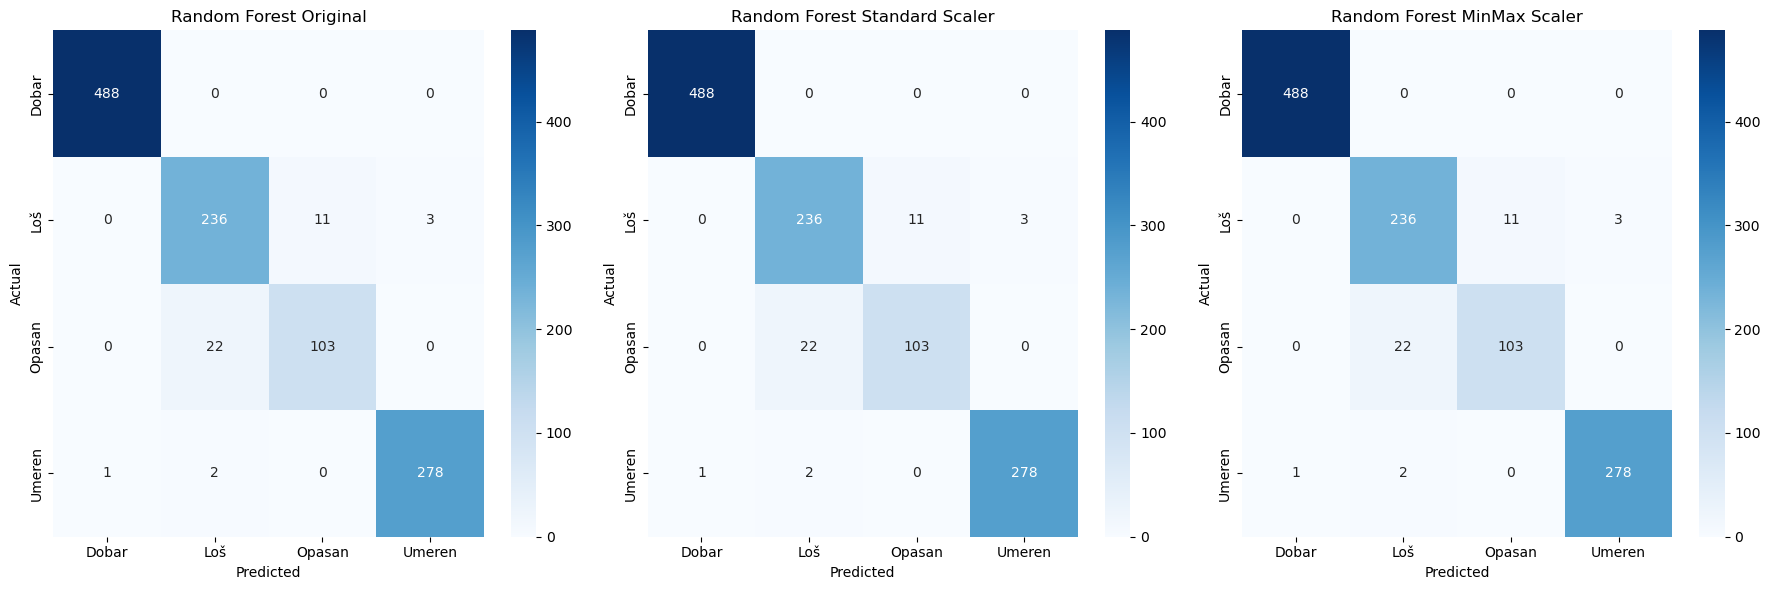

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Random Forest Original", "Random Forest Standard Scaler", "Random Forest MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_rf)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

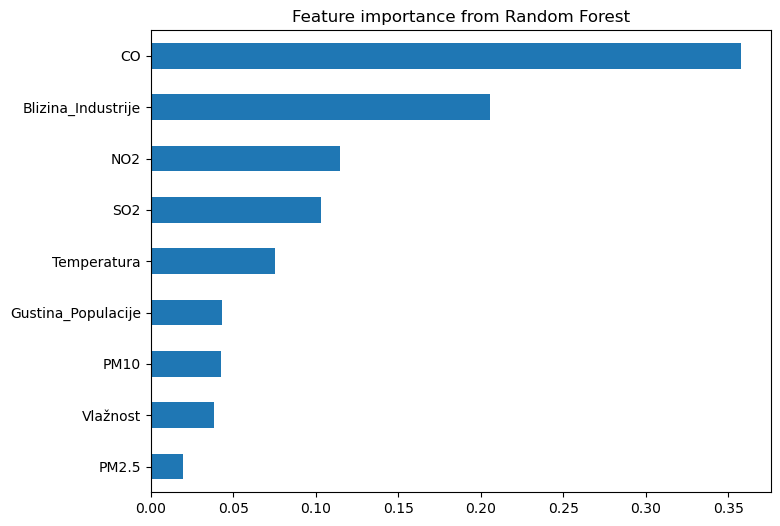

In [24]:
feat_importance = pd.Series(model.feature_importances_, index=features_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature importance from Random Forest')
plt.show()

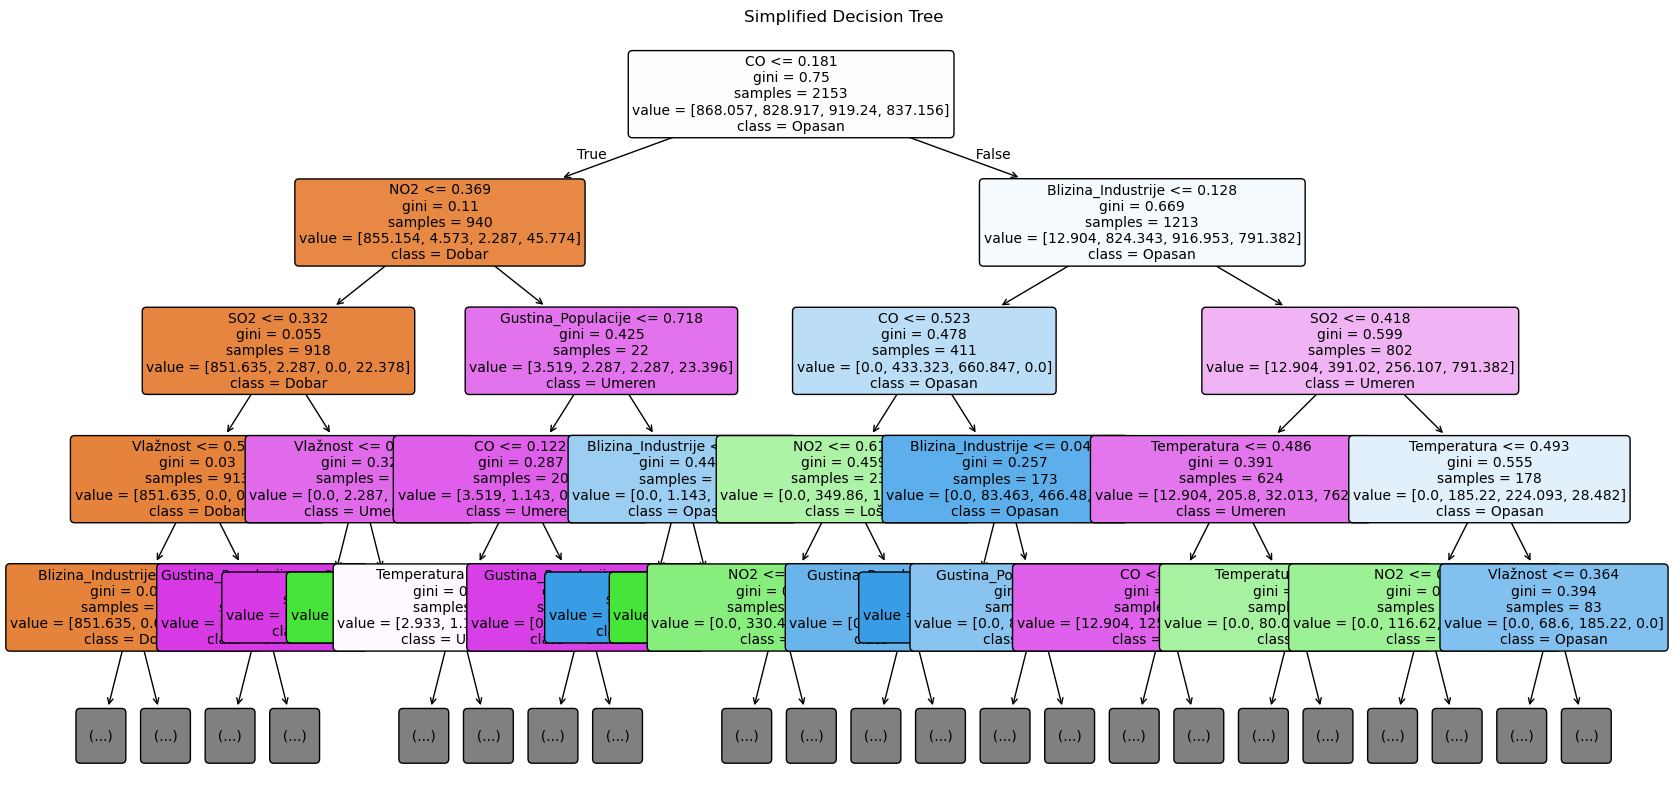

In [25]:
from sklearn.tree import plot_tree
estimator = model.estimators_[1]

plt.figure(figsize=(20,10))
plot_tree(estimator,feature_names=features.columns,class_names=encoder.classes_,max_depth=4,filled=True,rounded=True,fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()

Originalni dataset

* Visoka vrednost F1 za većinu klasa
* Nizak odziv za klasu "Opasan", s time da je pogrešna predikcija bila klasa "Loš"
* Na osnovu analize karakteristika koje su najviše uticale na stablo odlučivanja možemo videti da se tu izdvojile CO i Blizina Industrije, kao neke osobine koje smo i očekivale da se pojave
* *Zaključak:* Najbolje ukupne metrike nekog modela, bez skaliranja ulaznog skupa podataka

Skalirani dataset

* *Zaključak:* Random Forest je dao najbolje rezultate predikcije, s time da se nije postigao bolji efekat uz skaliranje

### Support Vector Machine

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

reports_svm = []
conf_matrixs_svm = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_svm.append((name,conf_matrix))
    reports_svm.append(report)

In [27]:
showReports(dfs=reports_svm,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.830420,0.973361,0.896226,488.0
Loš,0.636704,0.680000,0.657640,250.0
Opasan,0.884615,0.368000,0.519774,125.0
Umeren,0.644269,0.580071,0.610487,281.0
macro avg,0.749002,0.650358,0.671032,1144.0
weighted avg,0.748284,0.746503,0.732768,1144.0
accuracy,NaN,NaN,0.746503,NaN
,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.894309,0.880000,0.887097,250.0


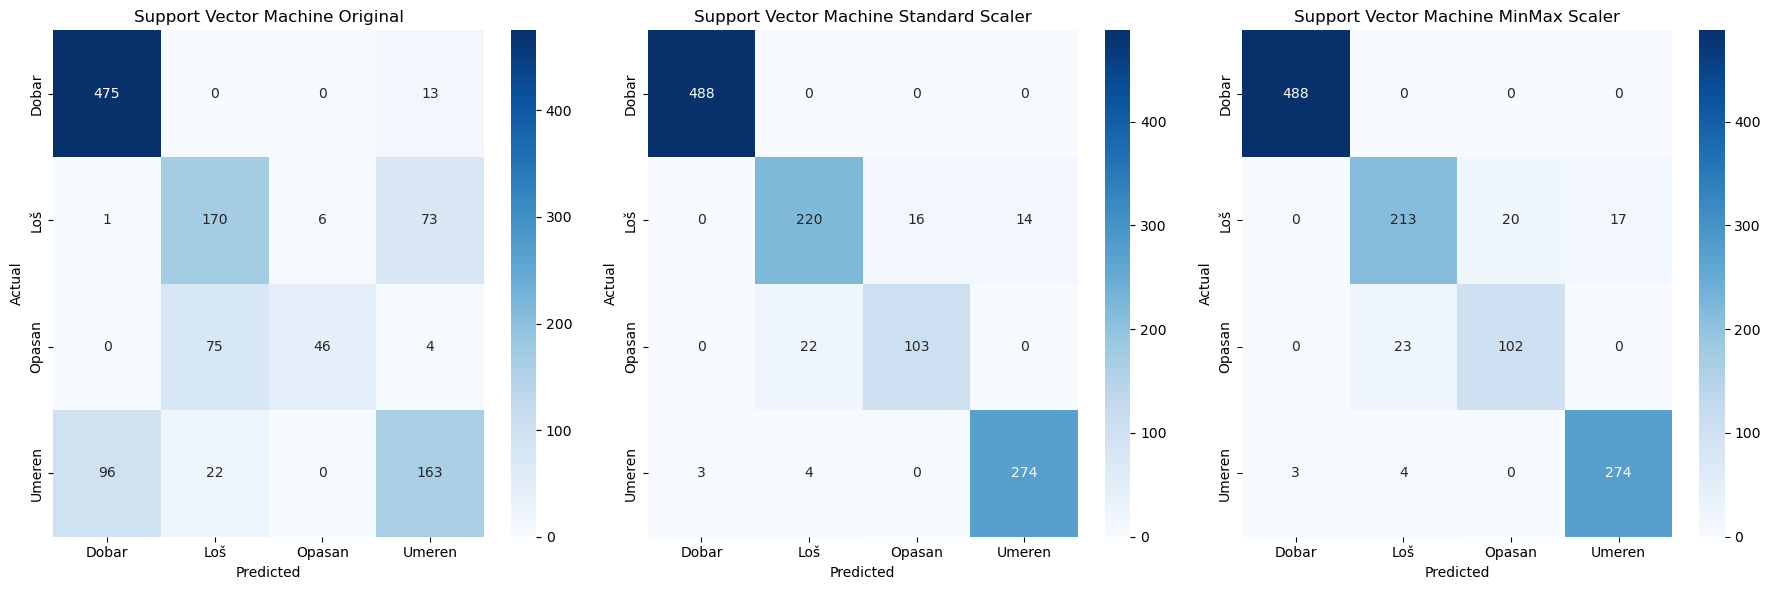

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Support Vector Machine Original", "Support Vector Machine Standard Scaler", "Support Vector Machine MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_svm)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Originalni dataset

* Generalno dobri rezultati za klasu "Dobar"
* Odziv za klasu "Opasan" je skoro 1, dakle veliki broj tačnih predviđanja
* Klasa "Loš" je imala niže vrednosti za odziv i F1
* *Zaključak:* Model je dao bolje rezultate od Dummy Classifier-a i Logistic Regression, ali ne i od Random Forest-a

Skalirani dataset

* Support Vector Machine je postigao značajno bolje rezultate nakon primene skaliranja nego pri radu sa originalnim skupom podataka
* Odziv kod klasa "Opasan" i "Loš" se dosta povećao u odnosu na primenu ovog modela nad originalnim skupom podataka
* Ostaje problem niskog odziva klase "Opasan", doduše prilikom skaliranja pogrešno je identifikovao kao klasa "Loš" što možemo smatrati da nije velika greška
* *Zaključak:* Model je imao veliko poboljšanje performansi usled skaliranja podataka, mada ostaje problem tačne detekcije klase "Opasan"

### Multinomial Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

reports_mnb = []
conf_matrixs_mnb = []
for name, dataset in datasets:
    if name == "Standard Scaled":
        continue
    if name == "Original":
        df_cleaned = df[(df >= 0).all(axis=1)]
        features = df_cleaned.drop('Kvalitet_Vazduha', axis=1)
        target = df_cleaned['Kvalitet_Vazduha']
    else:  # MinMax Scaled
        features = dataset.drop('Kvalitet_Vazduha', axis=1)
        target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = MultinomialNB()
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred, show_plot=False)
    conf_matrixs_mnb.append((name, conf_matrix))
    reports_mnb.append(report)

showReports(dfs=reports_mnb, titles=[name for name, _ in datasets if name != "Standard Scaled"])

c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,precision,recall,f1-score,support
Dobar,0.871102,0.865702,0.868394,484.0
Loš,0.306533,0.245968,0.272931,248.0
Opasan,0.372414,0.432000,0.400000,125.0
Umeren,0.496795,0.553571,0.523649,280.0
macro avg,0.511711,0.524310,0.516243,1137.0
weighted avg,0.600957,0.605981,0.602121,1137.0
accuracy,NaN,NaN,0.605981,NaN
,precision,recall,f1-score,support
Dobar,0.531012,1.000000,0.693674,488.0
Loš,0.429530,0.256000,0.320802,250.0


In [30]:
showReports(dfs=reports_mnb,titles=['Original', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.871102,0.865702,0.868394,484.0
Loš,0.306533,0.245968,0.272931,248.0
Opasan,0.372414,0.432000,0.400000,125.0
Umeren,0.496795,0.553571,0.523649,280.0
macro avg,0.511711,0.524310,0.516243,1137.0
weighted avg,0.600957,0.605981,0.602121,1137.0
accuracy,NaN,NaN,0.605981,NaN
,precision,recall,f1-score,support
Dobar,0.531012,1.000000,0.693674,488.0
Loš,0.429530,0.256000,0.320802,250.0


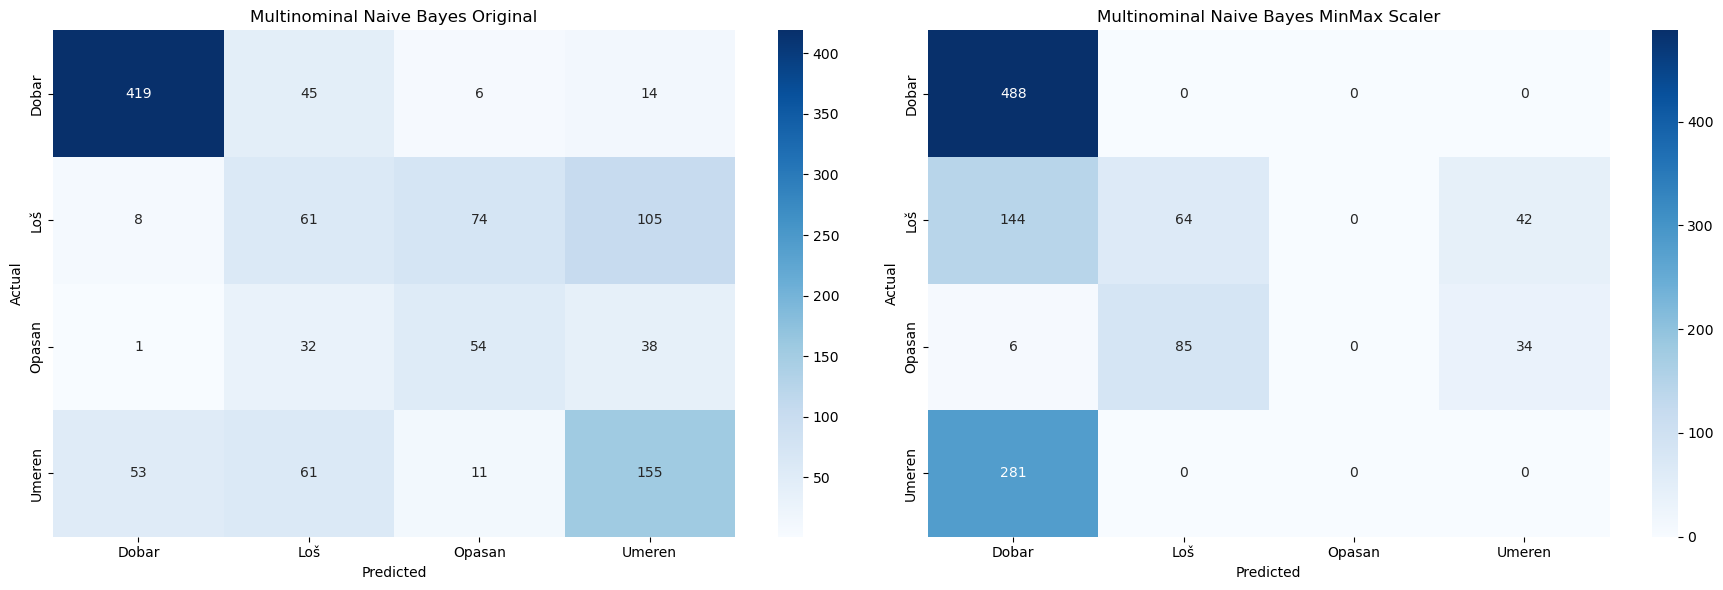

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Multinominal Naive Bayes Original","Multinominal Naive Bayes MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_mnb)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Originalni dataset

* Izuzetno loš odziv za klasu "Opasan", svega jedno tačno predviđanje
* F1 rezultat za klasu "Opasan" je veoma niska
* Slaba robusnost kod nebalansiranih skupova podataka
* *Zaključak:* Model je dao veoma loše rezultate, jedva nešto bolji od Dummy Classifier-a

Skalirani dataset

* Primena Standard Scaler-a nije bila moguća budući da Multinomial Naive Bayes radi samo sa pozitivnim vrednostima
* Odziv i f1 je kod klasa "Opasan" i "Loš" nula, što znači da nije detektovan nijedan objekat ove klase
* *Zaključak:* Ovakav model je do sada dao najlošije rezultate nakon što se primenilo skaliranje skupa podataka

### KNN (K-Nearest Neighbors)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

reports_knn = []
conf_matrixs_knn = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_knn.append((name,conf_matrix))
    reports_knn.append(report)

In [33]:
showReports(dfs=reports_knn,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.878676,0.979508,0.926357,488.0
Loš,0.671329,0.768000,0.716418,250.0
Opasan,0.819672,0.400000,0.537634,125.0
Umeren,0.770751,0.693950,0.730337,281.0
macro avg,0.785107,0.710365,0.727686,1144.0
weighted avg,0.800408,0.799825,0.789856,1144.0
accuracy,NaN,NaN,0.799825,NaN
,precision,recall,f1-score,support
Dobar,0.977956,1.000000,0.988855,488.0
Loš,0.820225,0.876000,0.847195,250.0


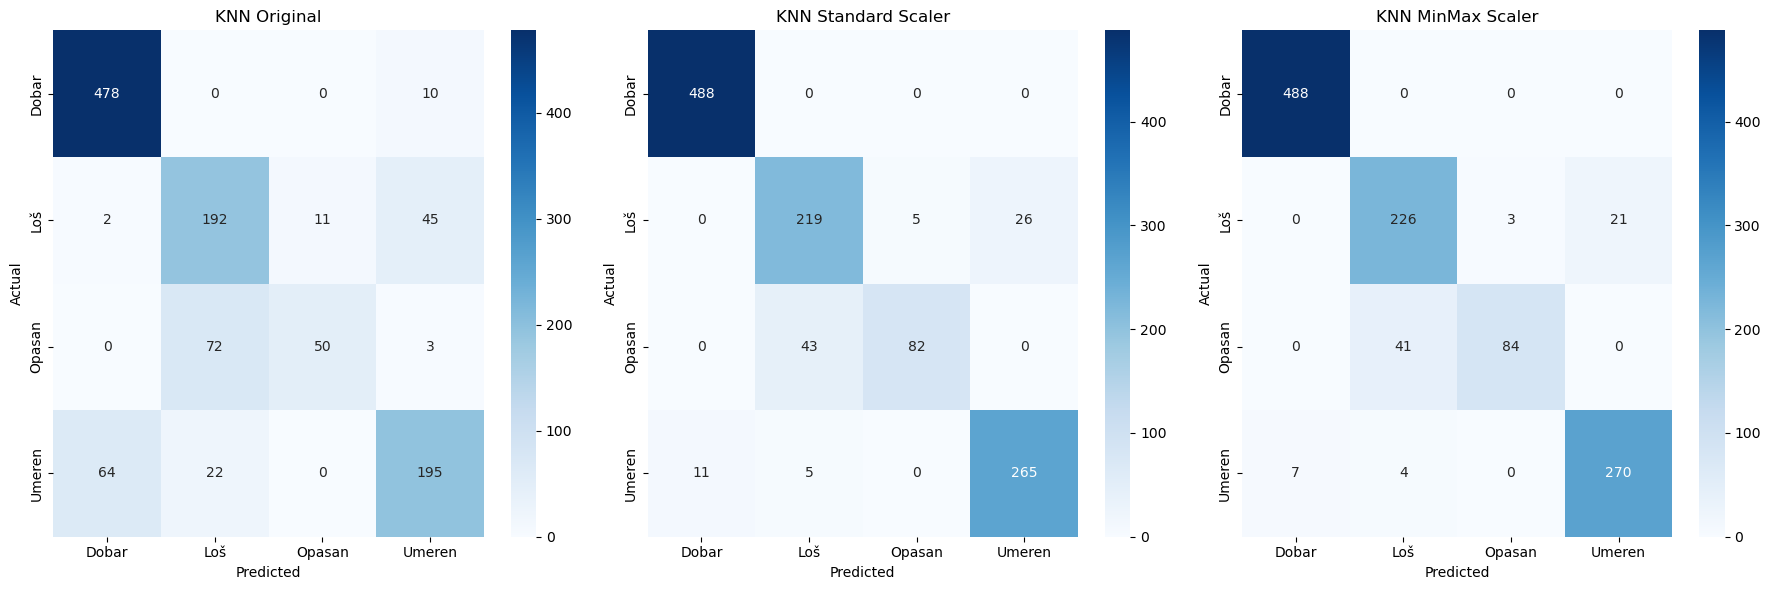

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["KNN Original", "KNN Standard Scaler", "KNN MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_knn)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Originalni dataset

* Odziv, preciznost i F1 za klasu 'Dobar' su visoki, dok je za ostale klase vrednost ovih rezultata manja
* Uvođenjem PCA je došlo do smanjenja kvaliteta predikcije, usled velikog raspona vrednosti atributa
* *Zaključak:* Ovaj model je dao bolje rezultate od nekih drugih, ali uz lošu predikciju klasa "Loš" i "Opasan"

Skalirani dataset

* Uvođenjem skaliranja skupa podataka odziv klase "Dobar" je dostigao 1, čime su sve predikcije tačne
* Odziv klasa "Loš" i "Opasan" se povećao, pri čemu je malo veće povećanje prilikom pirmene MinMax skaliranja
* Opšta tačnost predikcije je dostigla nivo Random Forest modela, ali je detekcija klase "Opasan" ipak malo slabija
* *Zaključak:* Uveđenje skaliranja kod ovog modela je dovelo do poboljšanja rezultata, čime je ovaj model postao drugi najbolji od do sada testiranih modela

### KNN (PCA)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

reports_knn_pca = []
conf_matrixs_knn_pca = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    pca = PCA(n_components=2)
    features_train = pca.fit_transform(features_train)
    features_test = pca.transform(features_test)
    model = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_knn_pca.append((name,conf_matrix))
    reports_knn_pca.append(report)

In [36]:
showReports(dfs=reports_knn_pca,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.701544,0.838115,0.763772,488.0
Loš,0.500000,0.548000,0.522901,250.0
Opasan,0.583333,0.336000,0.426396,125.0
Umeren,0.423256,0.323843,0.366935,281.0
macro avg,0.552033,0.511490,0.520001,1144.0
weighted avg,0.576228,0.593531,0.576796,1144.0
accuracy,NaN,NaN,0.593531,NaN
,precision,recall,f1-score,support
Dobar,0.968064,0.993852,0.980789,488.0
Loš,0.805147,0.876000,0.839080,250.0


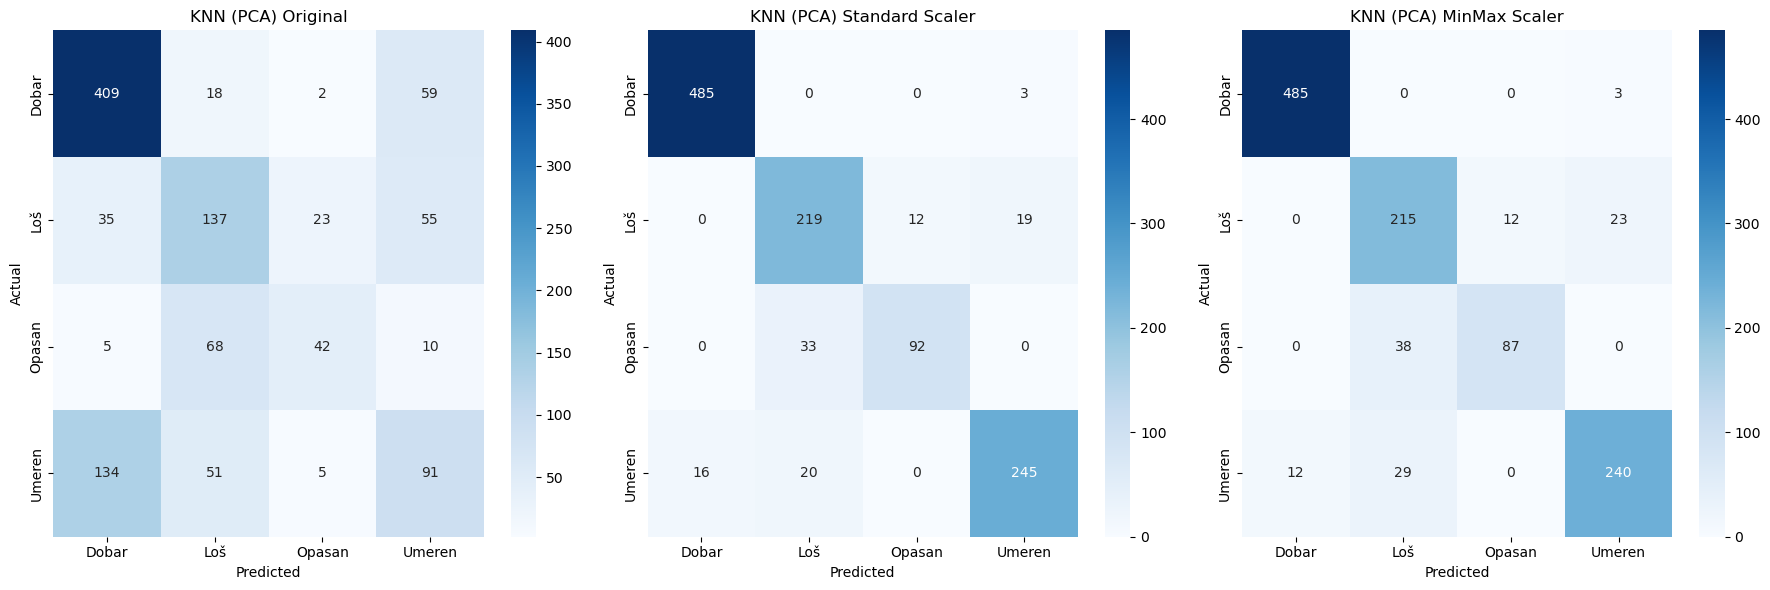

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["KNN (PCA) Original", "KNN (PCA) Standard Scaler", "KNN (PCA) MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_knn_pca)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Originalni dataset

* Klasa "Opasan" ima veoma nizak odziv, veliki broj puta je pogrešno detektovana klasa "Loš"
* Odziv klase "Dobar" je pristojan, kao i preciznost
* F1 rezultat je u gotovo svakoj klasi imao nisku vrednost
* *Zaključak*: Model nije dao zadovoljavajuće rezultate, te je potrebno izvršiti skaliranje kako bi se dobili neki bolji rezultati

Skalirani dataset

* Uvođenje skaliranja podataka je dovelo do značajnog poboljšanja predikcije na nivou svih klasa
* Malo bolje rezultate je dalo MinMax skaliranje u odnosu na Standard skaler
* U odnosu na original, klasa "Opasan" sada ima odziv 0.71 dok je ranije imala svega 0.33 
* *Zaključak:* Skaliranje je dosta pomoglo KNN modelu sa PCA redukcijom dimenzionalnosti, ali je ipak osnovni KNN dao malo bolje rezultate

### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

reports_gb = []
conf_matrixs_gb = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_gb.append((name,conf_matrix))
    reports_gb.append(report)

In [39]:
showReports(dfs=reports_gb,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.920949,0.932000,0.926441,250.0
Opasan,0.891667,0.856000,0.873469,125.0
Umeren,0.985663,0.978648,0.982143,281.0
macro avg,0.947537,0.941662,0.944493,1144.0
weighted avg,0.963898,0.964161,0.963972,1144.0
accuracy,NaN,NaN,0.964161,NaN
,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.920635,0.928000,0.924303,250.0


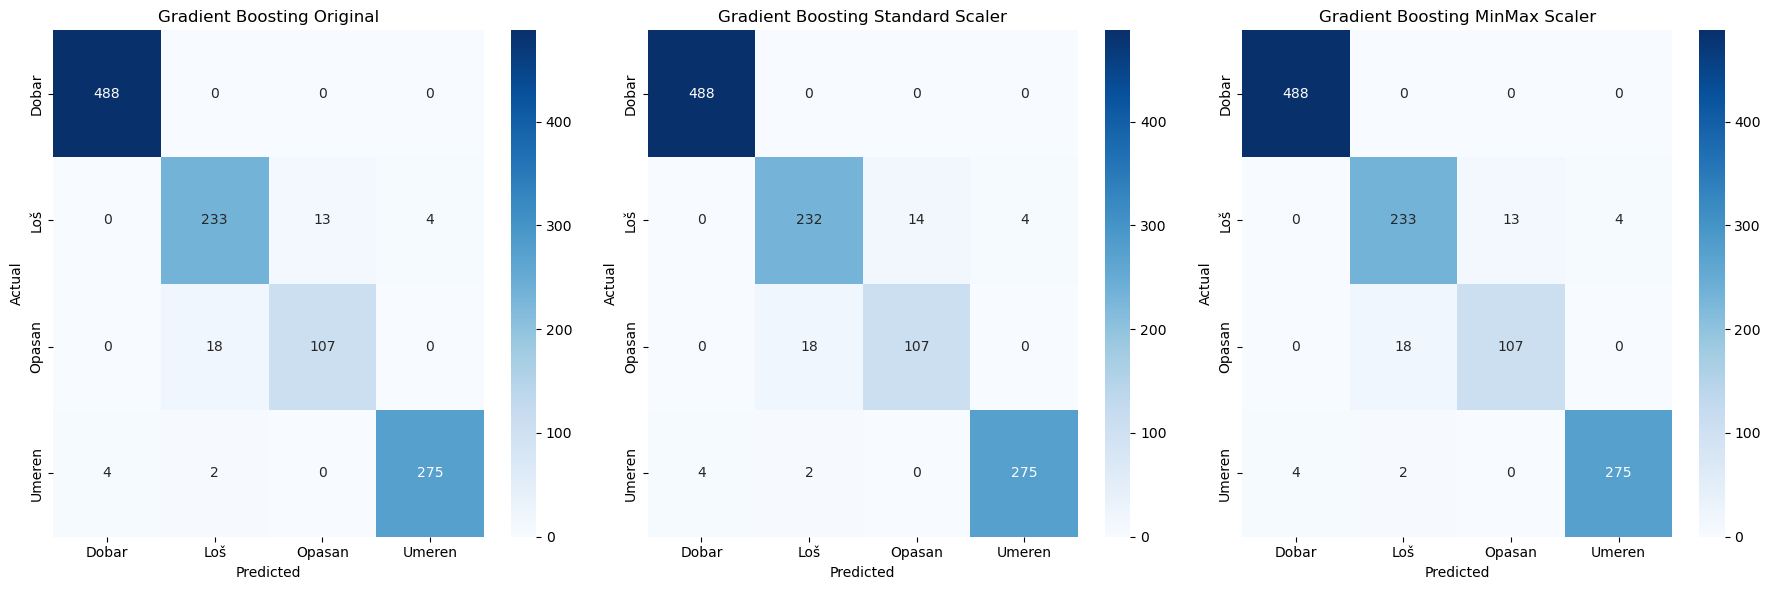

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Gradient Boosting Original", "Gradient Boosting Standard Scaler", "Gradient Boosting MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_gb)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### CATBOOST

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier

reports_catboost = []
conf_matrixs_catboost = []
for name, dataset in datasets:
    print("Dataset used: ",name)
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    classes = target_train.unique()
    class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train)
    class_weights_dict = dict(zip(classes, class_weights))

    model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, class_weights=list(class_weights_dict.values()), 
        eval_metric='Accuracy', verbose=100)

    model.fit(features_train, target_train,eval_set=(features_test, target_test),use_best_model=True)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_catboost.append((name,conf_matrix))
    reports_catboost.append(report)

Dataset used:  Original
0:	learn: 0.9000286	test: 0.8926646	best: 0.8926646 (0)	total: 174ms	remaining: 1m 26s
100:	learn: 0.9833677	test: 0.9659265	best: 0.9671375 (98)	total: 721ms	remaining: 2.85s
200:	learn: 0.9897131	test: 0.9708536	best: 0.9712642 (167)	total: 1.26s	remaining: 1.88s
300:	learn: 0.9941398	test: 0.9716748	best: 0.9720854 (222)	total: 1.82s	remaining: 1.2s
400:	learn: 0.9961799	test: 0.9713058	best: 0.9737069 (353)	total: 2.36s	remaining: 583ms
499:	learn: 0.9968576	test: 0.9729274	best: 0.9737069 (353)	total: 2.9s	remaining: 0us

bestTest = 0.9737069344
bestIteration = 353

Shrink model to first 354 iterations.
Dataset used:  Standard Scaled
0:	learn: 0.9000286	test: 0.8926646	best: 0.8926646 (0)	total: 5.3ms	remaining: 2.64s
100:	learn: 0.9833677	test: 0.9659265	best: 0.9671375 (98)	total: 571ms	remaining: 2.25s
200:	learn: 0.9897131	test: 0.9708536	best: 0.9712642 (167)	total: 1.12s	remaining: 1.66s
300:	learn: 0.9941398	test: 0.9716748	best: 0.9720854 (222)	tota

In [42]:
showReports(dfs=reports_catboost,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.995918,1.000000,0.997955,488.0
Loš,0.936975,0.892000,0.913934,250.0
Opasan,0.866142,0.880000,0.873016,125.0
Umeren,0.965398,0.992883,0.978947,281.0
macro avg,0.941108,0.941221,0.940963,1144.0
weighted avg,0.961360,0.961538,0.961273,1144.0
accuracy,NaN,NaN,0.961538,NaN
,precision,recall,f1-score,support
Dobar,0.995918,1.000000,0.997955,488.0
Loš,0.936975,0.892000,0.913934,250.0


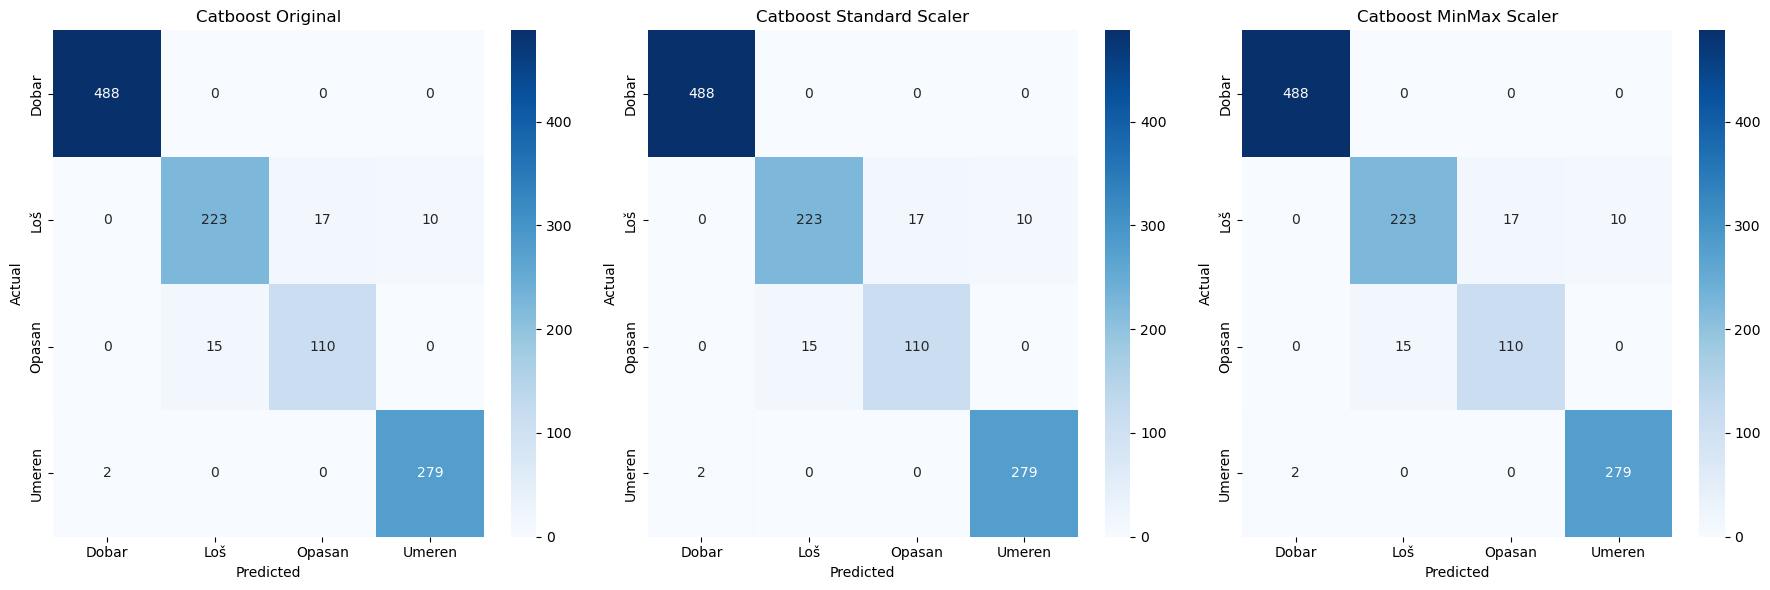

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Catboost Original", "Catboost Standard Scaler", "Catboost MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_catboost)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

reports_dt = []
conf_matrixs_dt = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    model = DecisionTreeClassifier(random_state=0)
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_dt.append((name,conf_matrix))
    reports_dt.append(report)

In [45]:
showReports(dfs=reports_dt,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.850806,0.844000,0.847390,250.0
Opasan,0.753846,0.784000,0.768627,125.0
Umeren,0.974453,0.950178,0.962162,281.0
macro avg,0.892744,0.894544,0.893524,1144.0
weighted avg,0.930757,0.930070,0.930334,1144.0
accuracy,NaN,NaN,0.930070,NaN
,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.851406,0.848000,0.849699,250.0


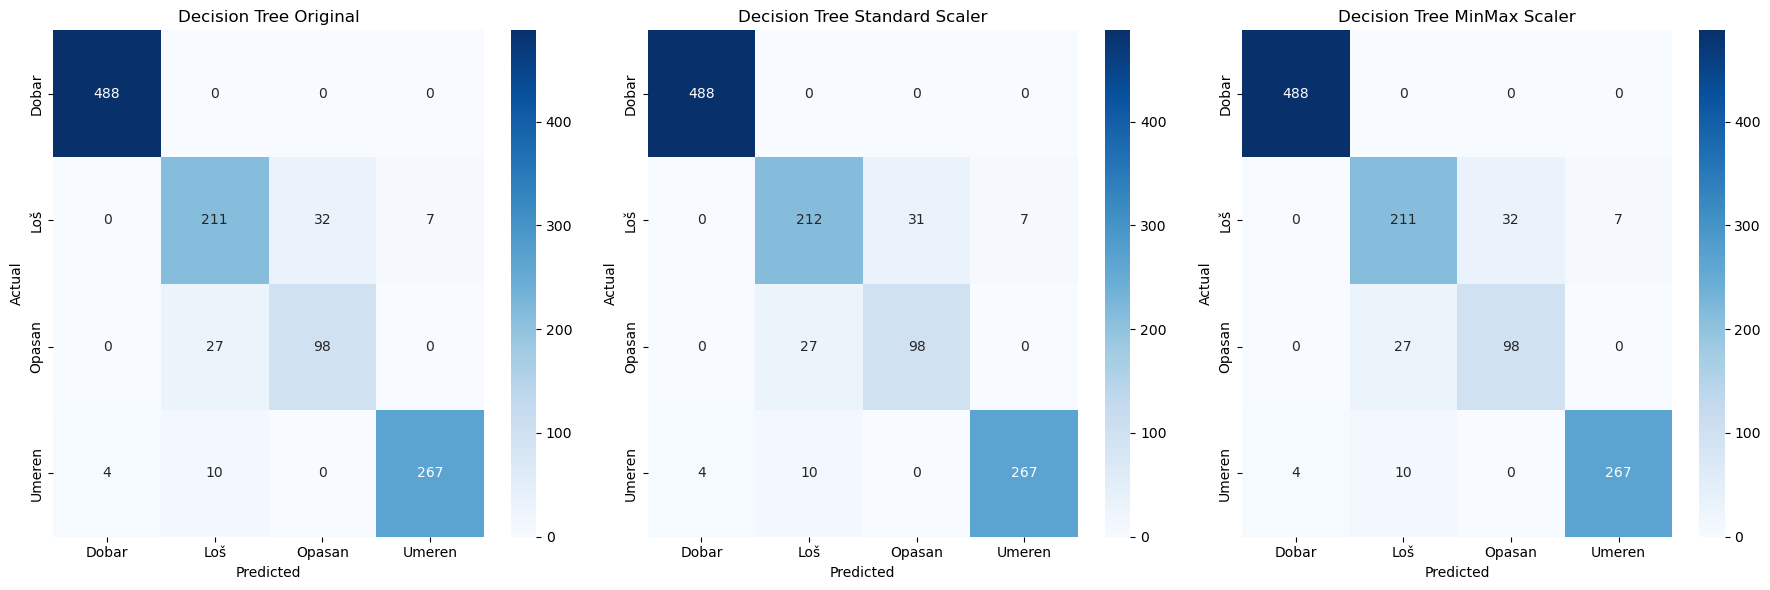

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Decision Tree Original", "Decision Tree Standard Scaler", "Decision Tree MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_dt)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Quadratic Discriminant Analysis

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

reports_qda = []
conf_matrixs_qda = []
for name, dataset in datasets:
    features = dataset.drop('Kvalitet_Vazduha', axis=1)
    target = df['Kvalitet_Vazduha']
    features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)
    if name == "Original":
        features_test_original=features_test
    model = QuadraticDiscriminantAnalysis(reg_param=0.1)
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)

    report = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
    conf_matrix = createConfusionMatrix(target_test, target_pred,show_plot=False)
    conf_matrixs_qda.append((name,conf_matrix))
    reports_qda.append(report)

In [48]:
showReports(dfs=reports_qda,titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.987830,0.997951,0.992864,488.0
Loš,0.900433,0.832000,0.864865,250.0
Opasan,0.826772,0.840000,0.833333,125.0
Umeren,0.928328,0.967972,0.947735,281.0
macro avg,0.910840,0.909481,0.909699,1144.0
weighted avg,0.936517,0.937063,0.936376,1144.0
accuracy,NaN,NaN,0.937063,NaN
,precision,recall,f1-score,support
Dobar,0.987854,1.000000,0.993890,488.0
Loš,0.884120,0.824000,0.853002,250.0


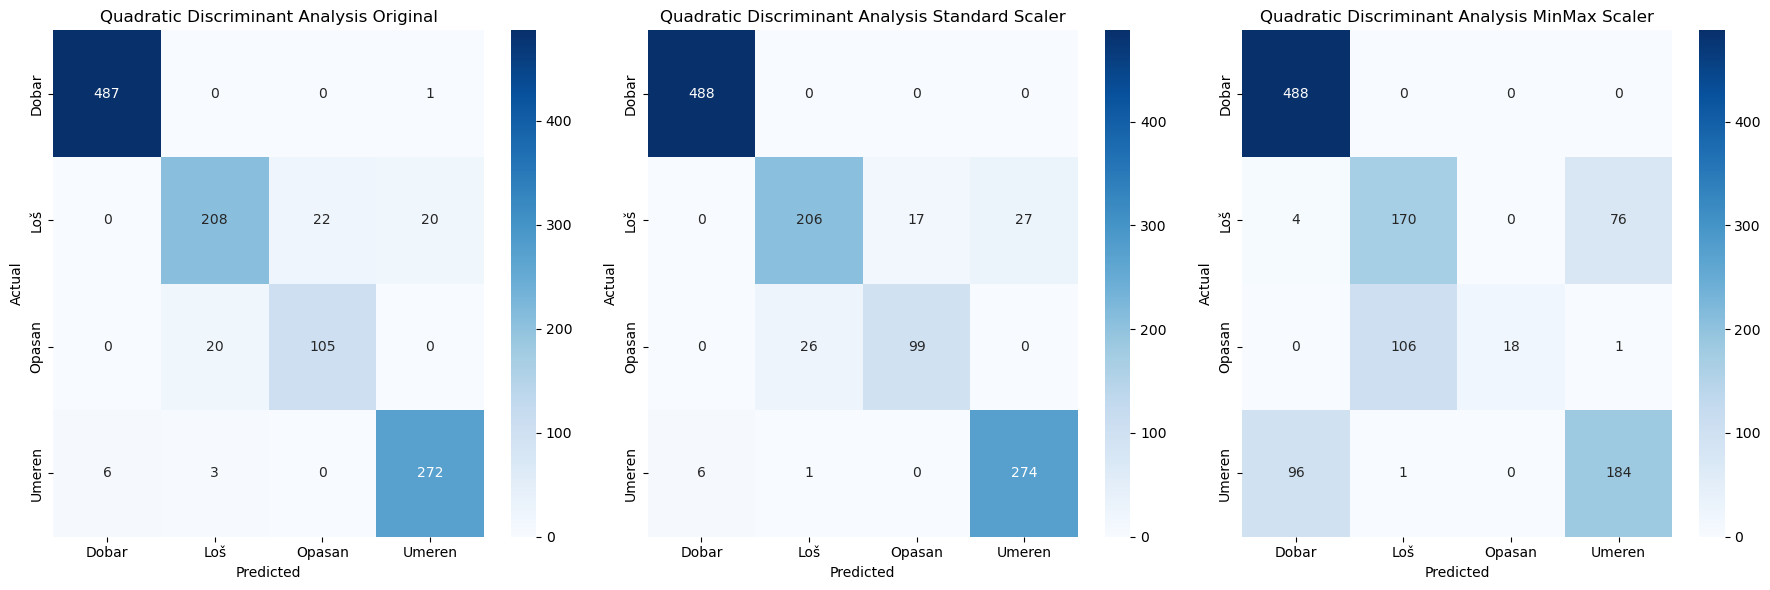

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

titles = ["Quadratic Discriminant Analysis Original", "Quadratic Discriminant Analysis Standard Scaler", "Quadratic Discriminant Analysis MinMax Scaler"]

for idx, (title, (_, conf_matrix)) in enumerate(zip(titles, conf_matrixs_qda)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs_rf), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

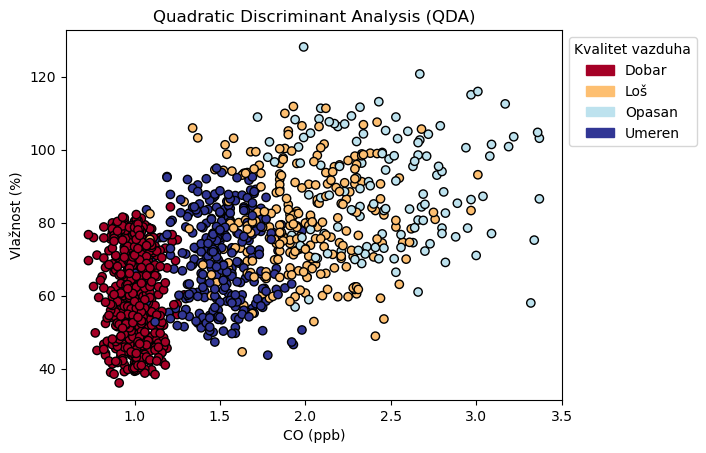

In [50]:
import matplotlib.patches as mpatches

scatter = plt.scatter(features_test_original.iloc[:, 6], features_test_original.iloc[:, 1], c=target_test, edgecolor="k", cmap=plt.cm.RdYlBu)
plt.title("Quadratic Discriminant Analysis (QDA)")
plt.xlabel(f"{features_test_original.columns[6]} (ppb)")
plt.ylabel(f"{features_test_original.columns[1]} (%)")

unique_classes = np.unique(target_test)
colors = [plt.cm.RdYlBu(i / (len(unique_classes)-1 if len(unique_classes)>1 else 1)) for i in range(len(unique_classes))]
handles = [mpatches.Patch(color=color, label=encoder.inverse_transform([cls])[0]) for color, cls in zip(colors, unique_classes)]
plt.legend(handles=handles, title="Kvalitet vazduha", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Pregled modela

Odabrani su najbolje verzije dataset-a za svaki model

In [51]:
conf_matrixs = {
    "Dummy Classification": conf_matrix_dummy,
    "Logistic Regression Standard Scaled": conf_matrixs_lr[1][1],
    "Random Forest Original": conf_matrixs_rf[0][1],
    "Support Vector Machine Standard Scaled": conf_matrixs_svm[1][1],
    "Multinomial Naive Bayes Original": conf_matrixs_mnb[0][1],
    "KNN MinMax Scaled": conf_matrixs_knn[2][1],
    "KNN (PCA) Standard Scaled": conf_matrixs_knn_pca[1][1],
    "Gradient Boosting MinMax Scaled": conf_matrixs_gb[2][1],
    "Catboost Original": conf_matrixs_catboost[0][1],
    "Decision Tree Original": conf_matrixs_dt[0][1],
    "Quadratic Discriminant Analysis Original": conf_matrixs_qda[0][1],
}

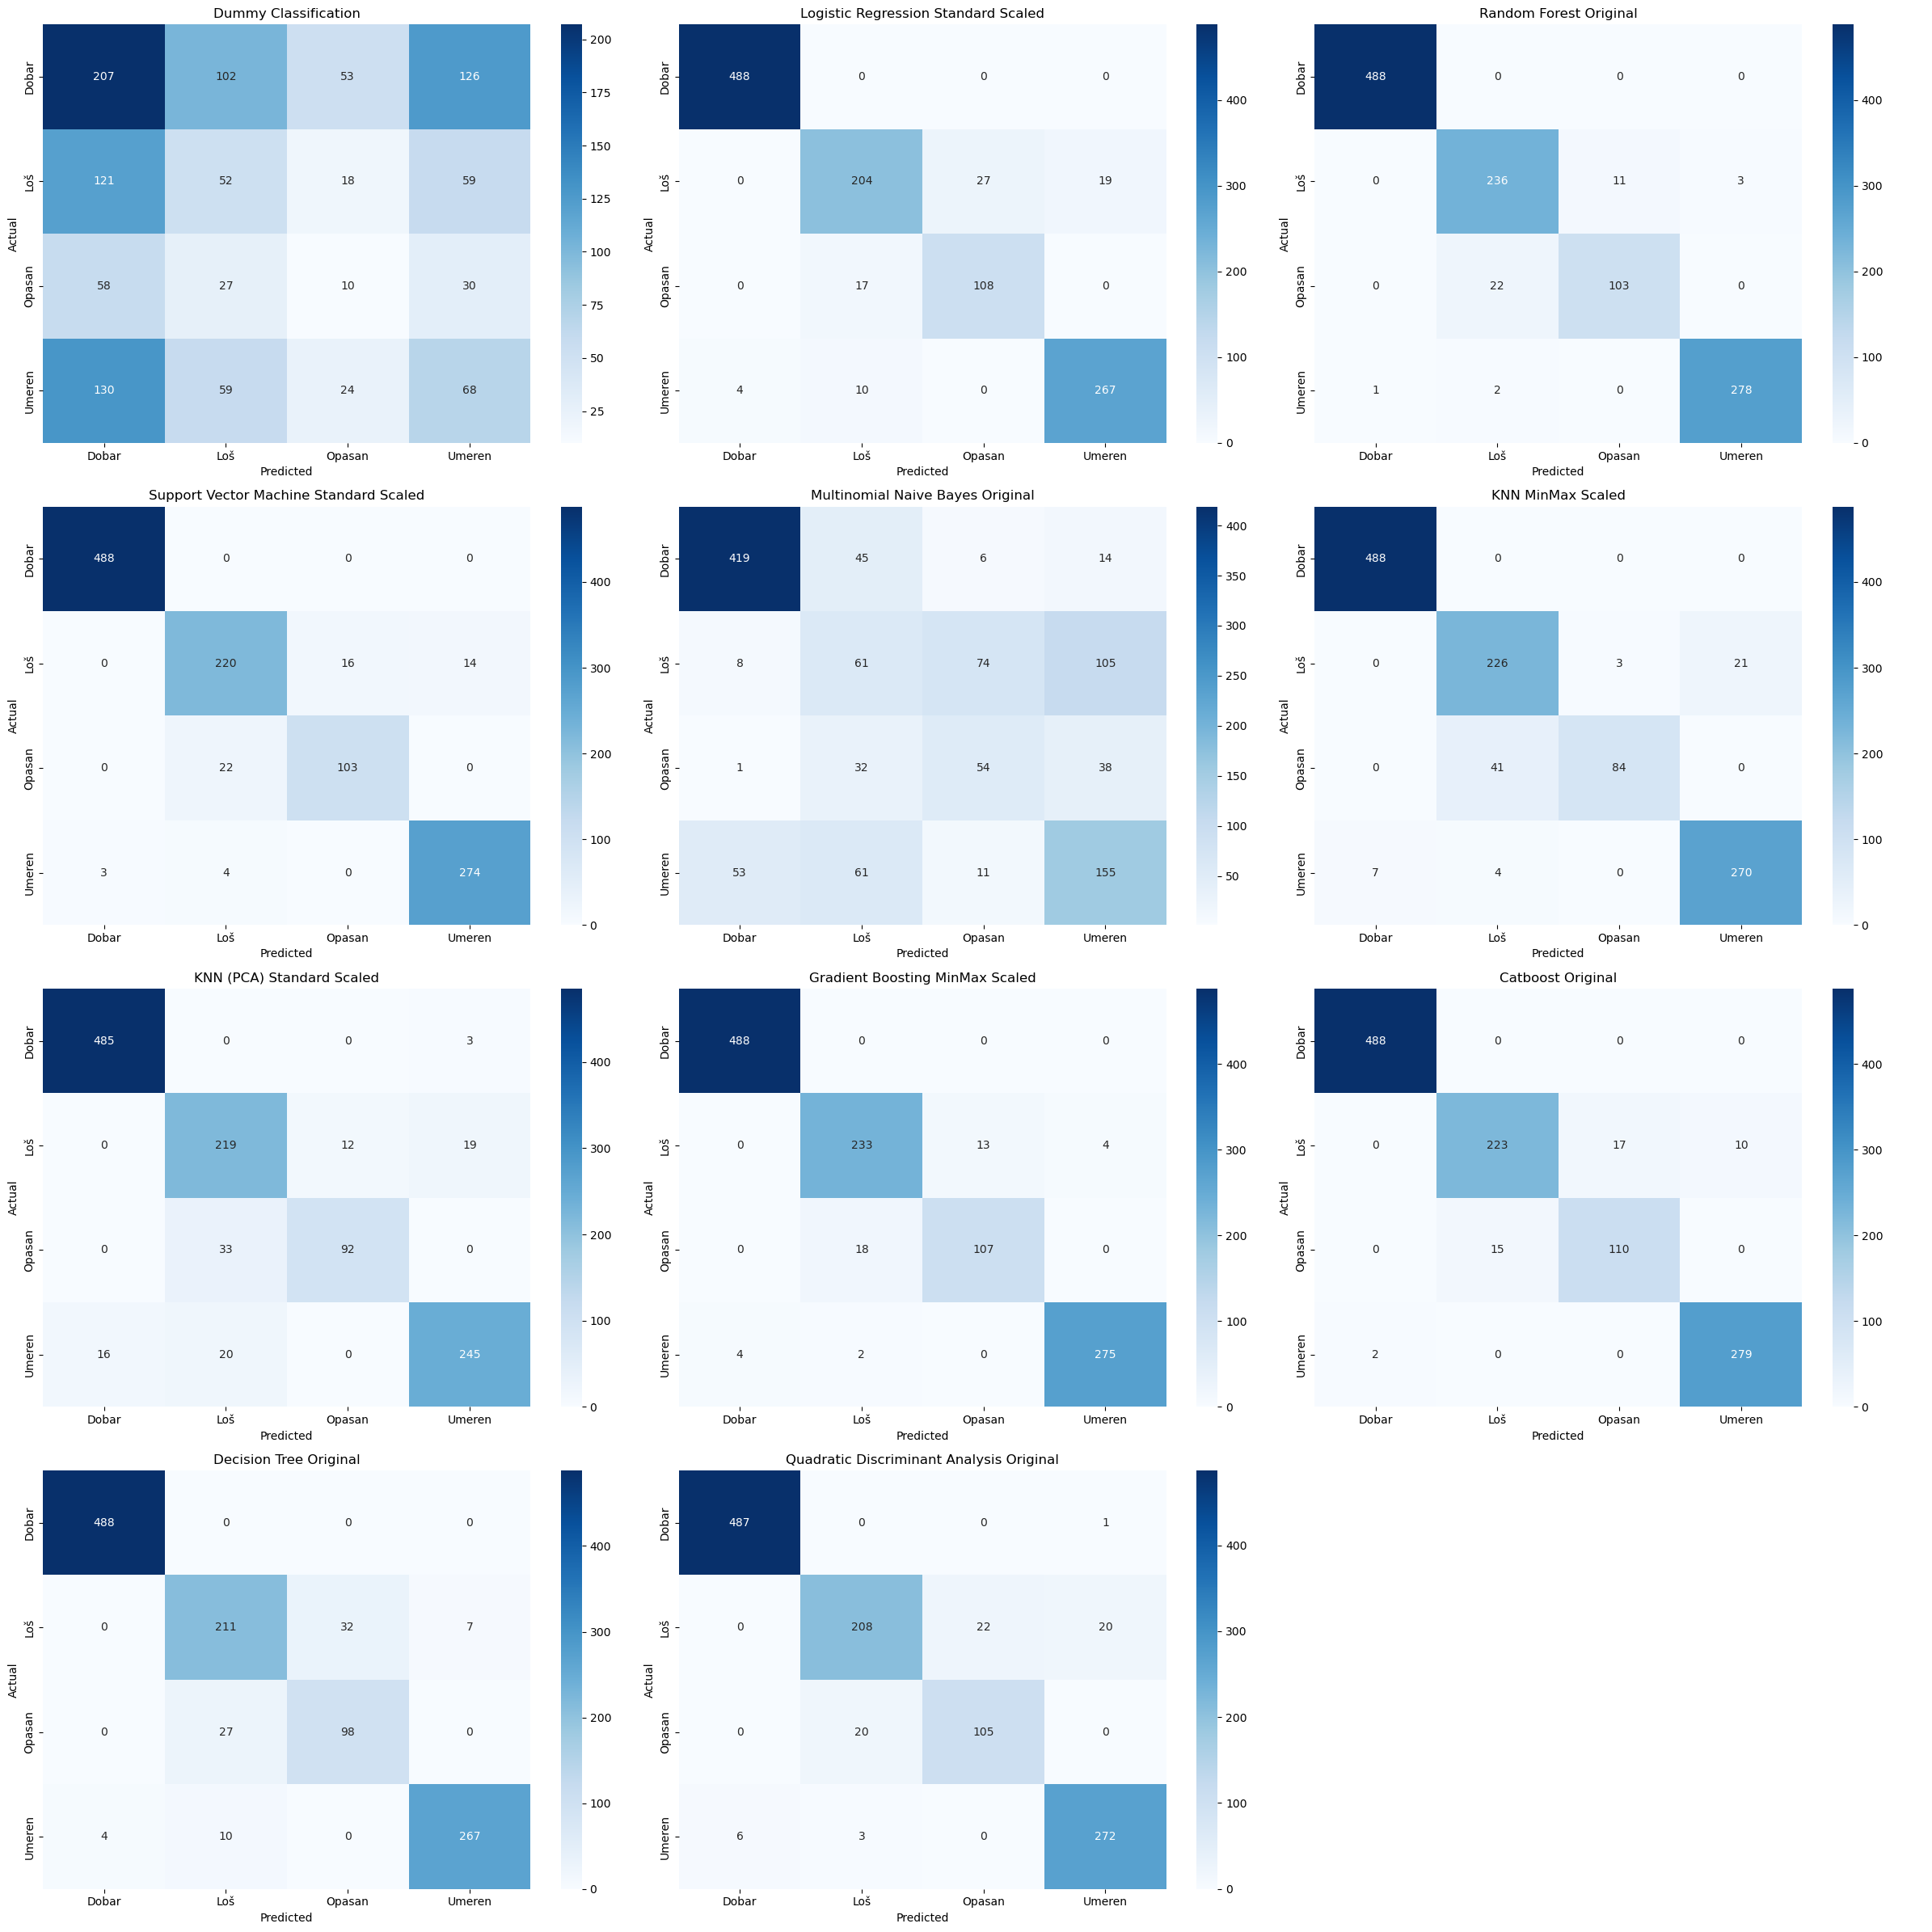

In [52]:
n = len(conf_matrixs)
cols = 3
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 6))
axes = axes.flatten()

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    seaborn.heatmap(conf, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(n, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Na osnovu matrice konfuzije i rezultata svake klasifikacije dobijen je sledeća lista modela, od onog koji je dao najbolje do onog koji je dao najlošije rezultate.

1. Random Forest
2. Catboost
3. Gradient Boosting
4. Support Vector Machine
5. KNN
6. KNN (PCA)
7. Decision Tree
8. Quadratic Discriminant Analysis
9. Logistic Regression
10. Multinomial Naive Bayes
11. Dummy Classification

Dalje usavršavanje se može raditi proširivanjem skupa podataka. Analiza uticaja proširenja će se raditi nad sledećim modelima Random Forest, Catboost i Support Vector Machine. Iako je Gradient Boosting model dao bolje rezultate od SVM, usled svoje slične prirode kao Catboost, te neće biti dalje analiziran. 

## Proširivanje skupa podataka

### SMOTE (Synthetic Minority Over-sampling Technique)

In [53]:
# Cell 84: SMOTE (Synthetic Minority Over-sampling Technique) - proširenje skupa podataka

from imblearn.over_sampling import SMOTE

# Priprema podataka za SMOTE (bez target kolone)
features = df.drop('Kvalitet_Vazduha', axis=1)
target = df['Kvalitet_Vazduha']

# Primena SMOTE (za numeričke podatke)
smote = SMOTE(random_state=42)
features_smote, target_smote = smote.fit_resample(features, target)

# Kreiraj novi DataFrame sa SMOTE podacima
df_smote = pd.DataFrame(features_smote, columns=features.columns)
df_smote['Kvalitet_Vazduha'] = target_smote

print("Original distribucija klasa:\n", target.value_counts())
print("SMOTE distribucija klasa:\n", df_smote['Kvalitet_Vazduha'].value_counts())
df_smote.head()

Original distribucija klasa:
 Kvalitet_Vazduha
0    1950
3    1124
1    1000
2     500
Name: count, dtype: int64
SMOTE distribucija klasa:
 Kvalitet_Vazduha
3    1950
0    1950
2    1950
1    1950
Name: count, dtype: int64


,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


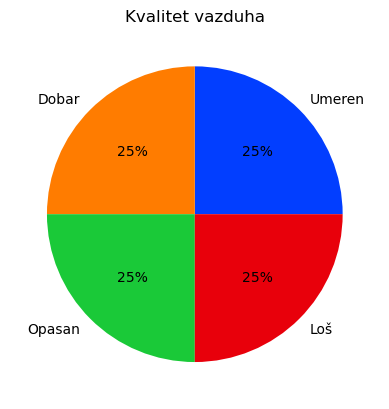

In [54]:
air_quality=df_smote['Kvalitet_Vazduha'].value_counts()
palette_color = seaborn.color_palette('bright') 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Kvalitet vazduha") 
plt.show() 

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = df.drop('Kvalitet_Vazduha', axis=1)
target = df['Kvalitet_Vazduha']
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)

smote = SMOTE(random_state=0)
features_train_res, target_train_res = smote.fit_resample(features_train, target_train)

model = RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=0)
model.fit(features_train_res, target_train_res)

target_pred = model.predict(features_test)
report_rf_smote = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
conf_matrix_rf_smote = createConfusionMatrix(target_test, target_pred,show_plot=False)

In [56]:
showReports(dfs=[reports_rf[0],report_rf_smote],titles=['Original','SMOTE'])

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN
,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.914980,0.904000,0.909457,250.0


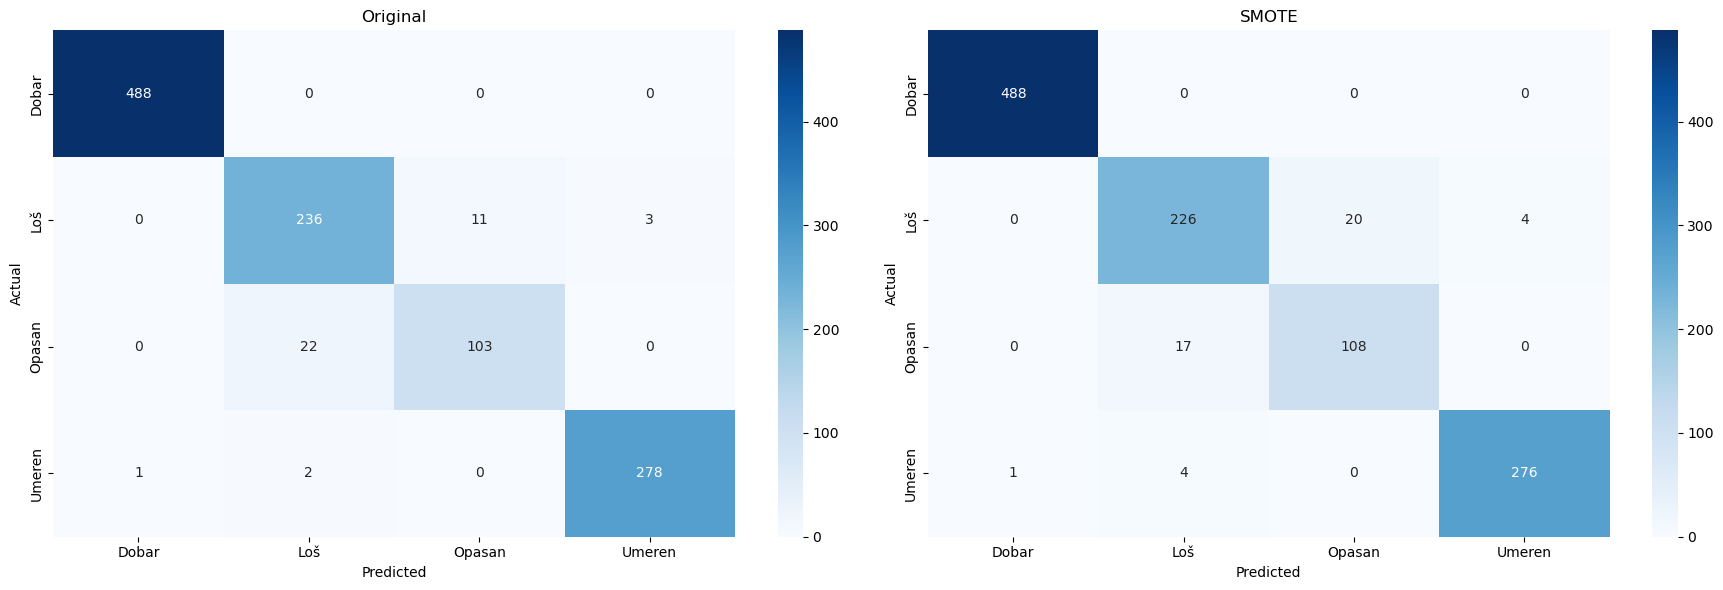

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Original","SMOTE"]
conf_matrices = [conf_matrixs_rf[0][1],conf_matrix_rf_smote] 

for idx, (title, conf_matrix) in enumerate(zip(titles, conf_matrices)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Catboost

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# Priprema podataka
features = df.drop('Kvalitet_Vazduha', axis=1)
target = df['Kvalitet_Vazduha']
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)

# SMOTE augmentacija samo na trening skupu
smote = SMOTE(random_state=0)
features_train_res, target_train_res = smote.fit_resample(features_train, target_train)

classes = target_train_res.unique()
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train_res)
class_weights_dict = dict(zip(classes, class_weights))

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    class_weights=list(class_weights_dict.values()),
    eval_metric='Accuracy',
    verbose=100
)

model.fit(features_train_res, target_train_res, eval_set=(features_test, target_test), use_best_model=True)
target_pred = model.predict(features_test)

report_catboost_smote = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
conf_matrix_catboost_smote = createConfusionMatrix(target_test, target_pred, show_plot=False)

0:	learn: 0.8301984	test: 0.8461538	best: 0.8461538 (0)	total: 5.91ms	remaining: 2.95s
100:	learn: 0.9745212	test: 0.9580420	best: 0.9589161 (72)	total: 625ms	remaining: 2.47s
200:	learn: 0.9864911	test: 0.9615385	best: 0.9632867 (135)	total: 1.32s	remaining: 1.97s
300:	learn: 0.9929891	test: 0.9606643	best: 0.9632867 (135)	total: 1.94s	remaining: 1.28s
400:	learn: 0.9958960	test: 0.9615385	best: 0.9632867 (135)	total: 2.58s	remaining: 636ms
499:	learn: 0.9977770	test: 0.9597902	best: 0.9632867 (135)	total: 3.18s	remaining: 0us

bestTest = 0.9632867133
bestIteration = 135

Shrink model to first 136 iterations.


In [59]:
showReports(dfs=[reports_catboost[0],report_catboost_smote],titles=['Original','SMOTE'])

,precision,recall,f1-score,support
Dobar,0.995918,1.000000,0.997955,488.0
Loš,0.936975,0.892000,0.913934,250.0
Opasan,0.866142,0.880000,0.873016,125.0
Umeren,0.965398,0.992883,0.978947,281.0
macro avg,0.941108,0.941221,0.940963,1144.0
weighted avg,0.961360,0.961538,0.961273,1144.0
accuracy,NaN,NaN,0.961538,NaN
,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.933610,0.900000,0.916497,250.0


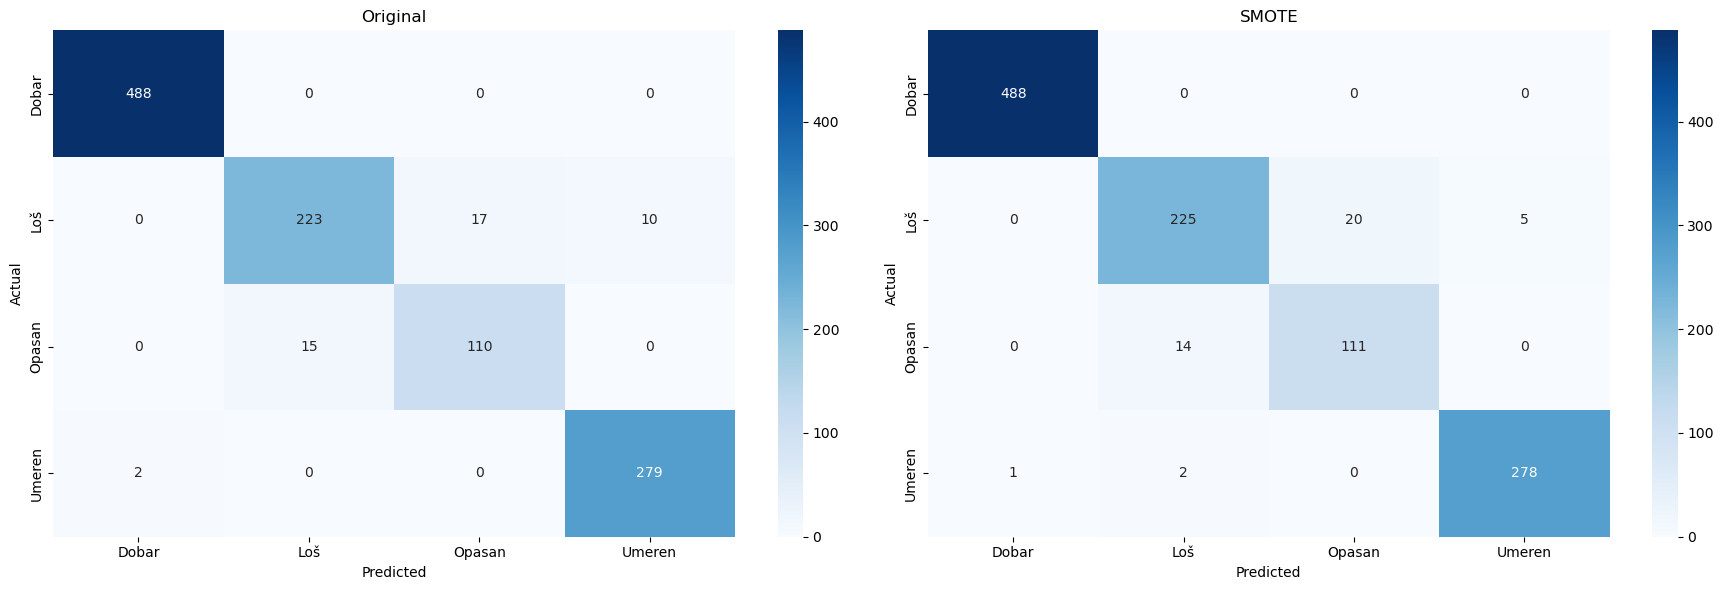

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Original","SMOTE"]
conf_matrices = [conf_matrixs_catboost[0][1],conf_matrix_catboost_smote]

for idx, (title, conf_matrix) in enumerate(zip(titles, conf_matrices)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Support Vector Machine

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Koristi Standard Scaled dataset za SVM + SMOTE
p = datasets[1][1]  # "Standard Scaled"
features = p.drop('Kvalitet_Vazduha', axis=1)
target = df['Kvalitet_Vazduha']

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)

# SMOTE augmentacija samo na trening skupu
smote = SMOTE(random_state=0)
features_train_res, target_train_res = smote.fit_resample(features_train, target_train)

model = SVC(kernel='rbf', decision_function_shape='ovo')
model.fit(features_train_res, target_train_res)

target_pred = model.predict(features_test)
report_svm_smote = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
conf_matrix_svm_smote = createConfusionMatrix(target_test, target_pred, show_plot=False)

In [62]:
showReports(dfs=[reports_svm[1],report_svm_smote],titles=['Original','SMOTE'])

,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.894309,0.880000,0.887097,250.0
Opasan,0.865546,0.824000,0.844262,125.0
Umeren,0.951389,0.975089,0.963093,281.0
macro avg,0.926284,0.919772,0.922847,1144.0
weighted avg,0.947665,0.948427,0.947938,1144.0
accuracy,NaN,NaN,0.948427,NaN
,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.901288,0.840000,0.869565,250.0


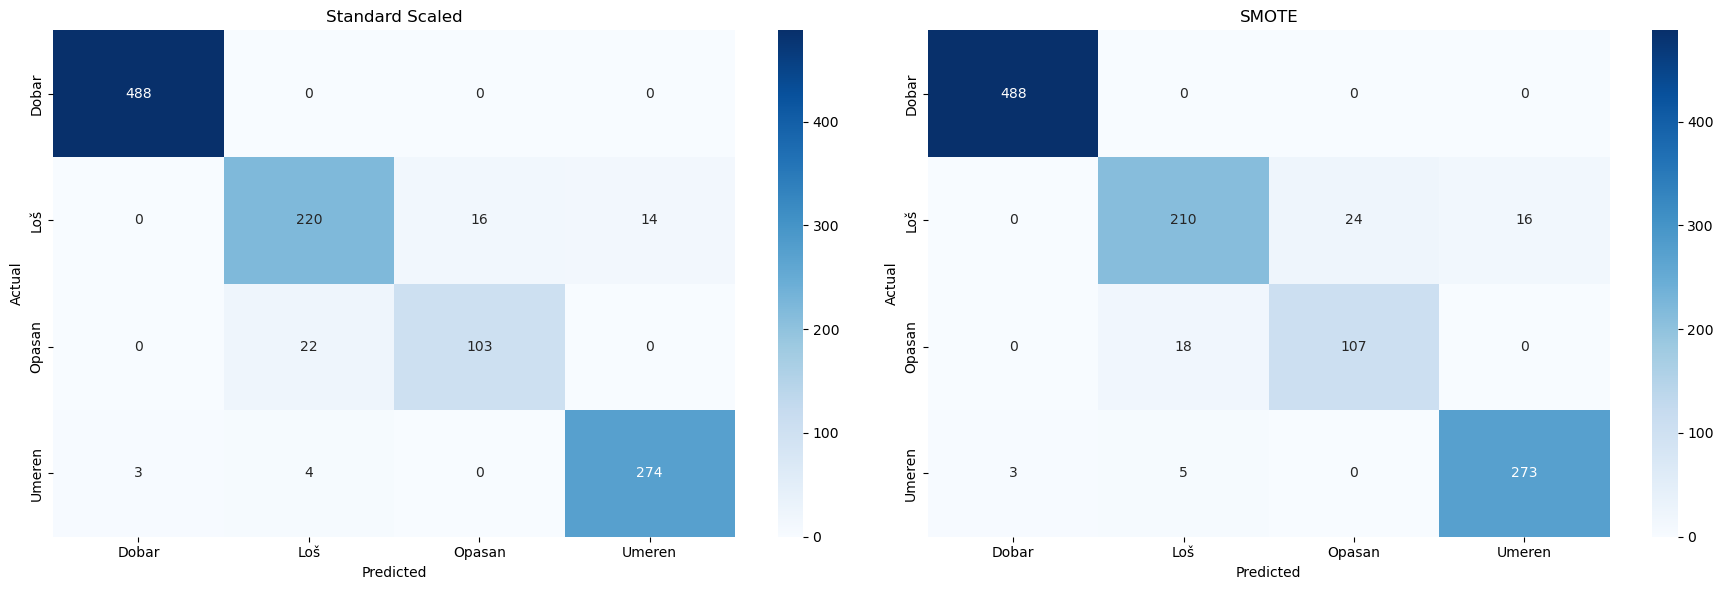

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Standard Scaled","SMOTE"]
conf_matrices = [conf_matrixs_svm[1][1],conf_matrix_svm_smote] 

for idx, (title, conf_matrix) in enumerate(zip(titles, conf_matrices)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Primena SMOTE metoda proširenja skupa podataka nije rezultovala boljom predikcijom. Izuzev predikcije klase "Opasan" koja je marginalno bolja, ostale klase su imale lošiji rezultat, čime je celokupno preciznost modela smanjena.

### CTGAN (Conditional Tabular Generative Adversarial Network)

In [69]:
# Augmentacija podataka korišćenjem CTGAN

from ctgan import CTGAN


# Priprema podataka za CTGAN (sve kolone, target kao kategorija)
df_ctgan = df.copy()
categorical_features = ['Kvalitet_Vazduha']

# Inicijalizacija i treniranje CTGAN modela
ctgan = CTGAN()
ctgan.fit(df_ctgan, categorical_features)

# Generiši sintetičke podatke (npr. dupliraj skup)
num_samples = len(df)
df_ctgan_synth = ctgan.sample(num_samples)

# Kombinuj originalni i sintetički skup
df_augmented = pd.concat([df, df_ctgan_synth], ignore_index=True)

print("Original distribucija klasa:\n", df['Kvalitet_Vazduha'].value_counts())
print("Augmentisana distribucija klasa:\n", df_augmented['Kvalitet_Vazduha'].value_counts())
df_augmented.head()

Original distribucija klasa:
 Kvalitet_Vazduha
0    1950
3    1124
1    1000
2     500
Name: count, dtype: int64
Augmentisana distribucija klasa:
 Kvalitet_Vazduha
0    3140
3    2318
1    2106
2    1584
Name: count, dtype: int64


,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


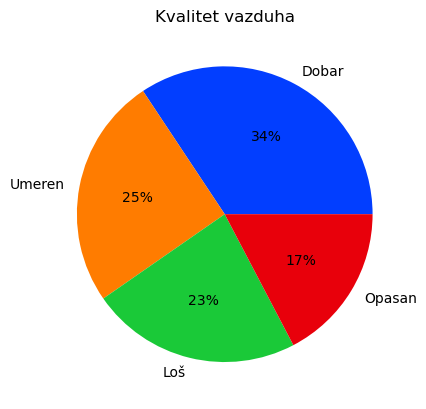

In [70]:
air_quality=df_augmented['Kvalitet_Vazduha'].value_counts()
palette_color = seaborn.color_palette('bright') 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Kvalitet vazduha") 
plt.show() 

In [86]:
# Priprema train/test skupa
features = df.drop('Kvalitet_Vazduha', axis=1)
target = df['Kvalitet_Vazduha']
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, stratify=target)

df_train = features_train.copy()
df_train['Kvalitet_Vazduha'] = target_train
categorical_features = ['Kvalitet_Vazduha']

ctgan = CTGAN(epochs=300)
ctgan.fit(df_train, categorical_features)

num_samples = len(df_train)
df_ctgan_synth = ctgan.sample(num_samples)

df_train_aug = pd.concat([df_train, df_ctgan_synth], ignore_index=True)

#### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from ctgan import CTGAN

features_train_aug = df_train_aug.drop('Kvalitet_Vazduha', axis=1)
target_train_aug = df_train_aug['Kvalitet_Vazduha']

model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=0)
model.fit(features_train_aug, target_train_aug)

target_pred = model.predict(features_test)
report_rf_ctgan = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
conf_matrix_rf_ctgan = createConfusionMatrix(target_test, target_pred, show_plot=False)

In [89]:
showReports(dfs=[reports_rf[0],report_rf_ctgan],titles=['Original','CTGAN'])

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN
,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.864151,0.916000,0.889320,250.0


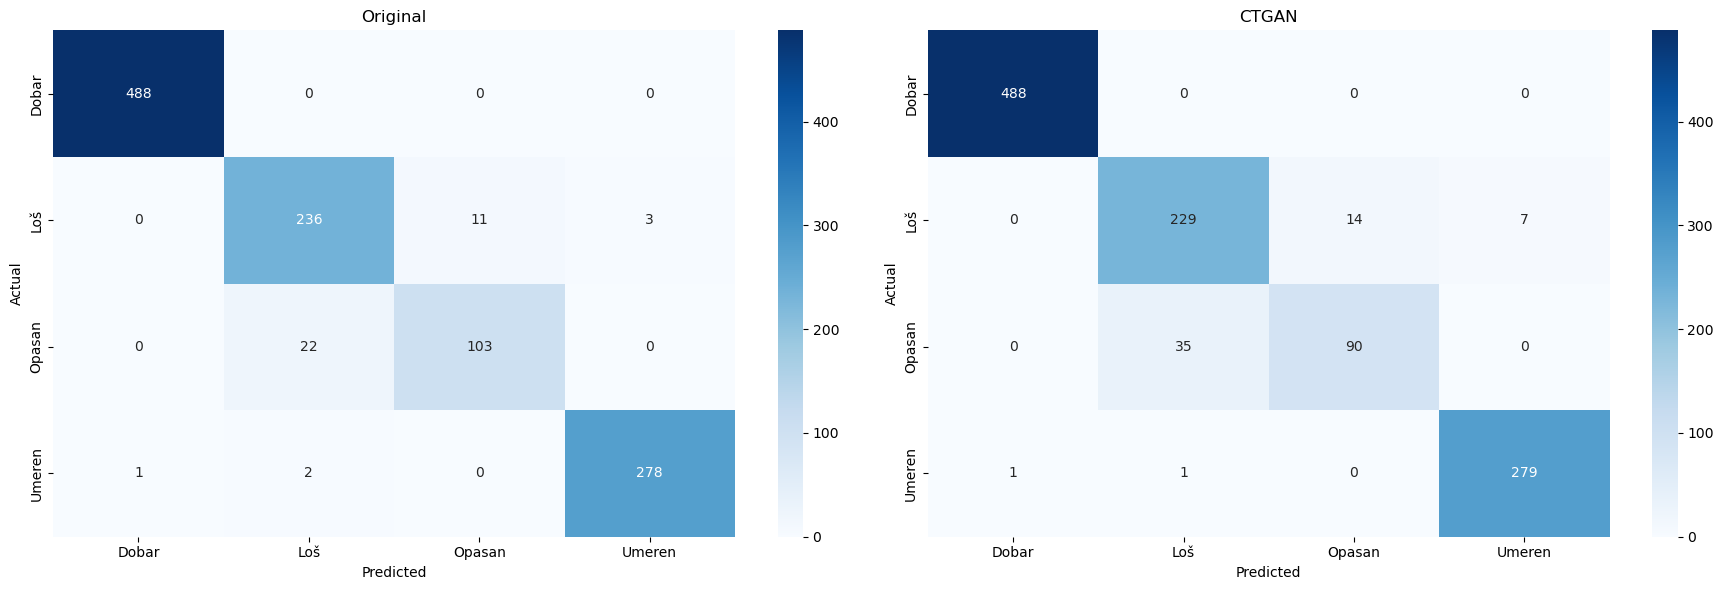

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Original","CTGAN"]
conf_matrices = [conf_matrixs_rf[0][1],conf_matrix_rf_ctgan]

for idx, (title, conf_matrix) in enumerate(zip(titles, conf_matrices)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Catboost

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# Priprema podataka
features_train_aug = df_train_aug.drop('Kvalitet_Vazduha', axis=1)
target_train_aug = df_train_aug['Kvalitet_Vazduha']

classes = target_train_aug.unique()
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train_res)
class_weights_dict = dict(zip(classes, class_weights))

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    class_weights=list(class_weights_dict.values()),
    eval_metric='Accuracy',
    verbose=100
)

model.fit(features_train_aug, target_train_aug, eval_set=(features_test, target_test), use_best_model=True)
target_pred = model.predict(features_test)

report_catboost_ctgan = createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True))
conf_matrix_catboost_ctgan = createConfusionMatrix(target_test, target_pred, show_plot=False)

0:	learn: 0.8298834	test: 0.8347902	best: 0.8347902 (0)	total: 7.11ms	remaining: 3.55s
100:	learn: 0.9495627	test: 0.9396853	best: 0.9423077 (84)	total: 671ms	remaining: 2.65s
200:	learn: 0.9615160	test: 0.9449301	best: 0.9466783 (128)	total: 1.38s	remaining: 2.05s
300:	learn: 0.9702624	test: 0.9475524	best: 0.9484266 (265)	total: 2s	remaining: 1.32s
400:	learn: 0.9779883	test: 0.9475524	best: 0.9493007 (354)	total: 2.64s	remaining: 652ms
499:	learn: 0.9825073	test: 0.9484266	best: 0.9493007 (354)	total: 3.24s	remaining: 0us

bestTest = 0.9493006993
bestIteration = 354

Shrink model to first 355 iterations.


In [92]:
showReports(dfs=[reports_catboost[0],report_catboost_ctgan],titles=['Original','CTGAN'])

,precision,recall,f1-score,support
Dobar,0.995918,1.000000,0.997955,488.0
Loš,0.936975,0.892000,0.913934,250.0
Opasan,0.866142,0.880000,0.873016,125.0
Umeren,0.965398,0.992883,0.978947,281.0
macro avg,0.941108,0.941221,0.940963,1144.0
weighted avg,0.961360,0.961538,0.961273,1144.0
accuracy,NaN,NaN,0.961538,NaN
,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,488.0
Loš,0.880952,0.888000,0.884462,250.0


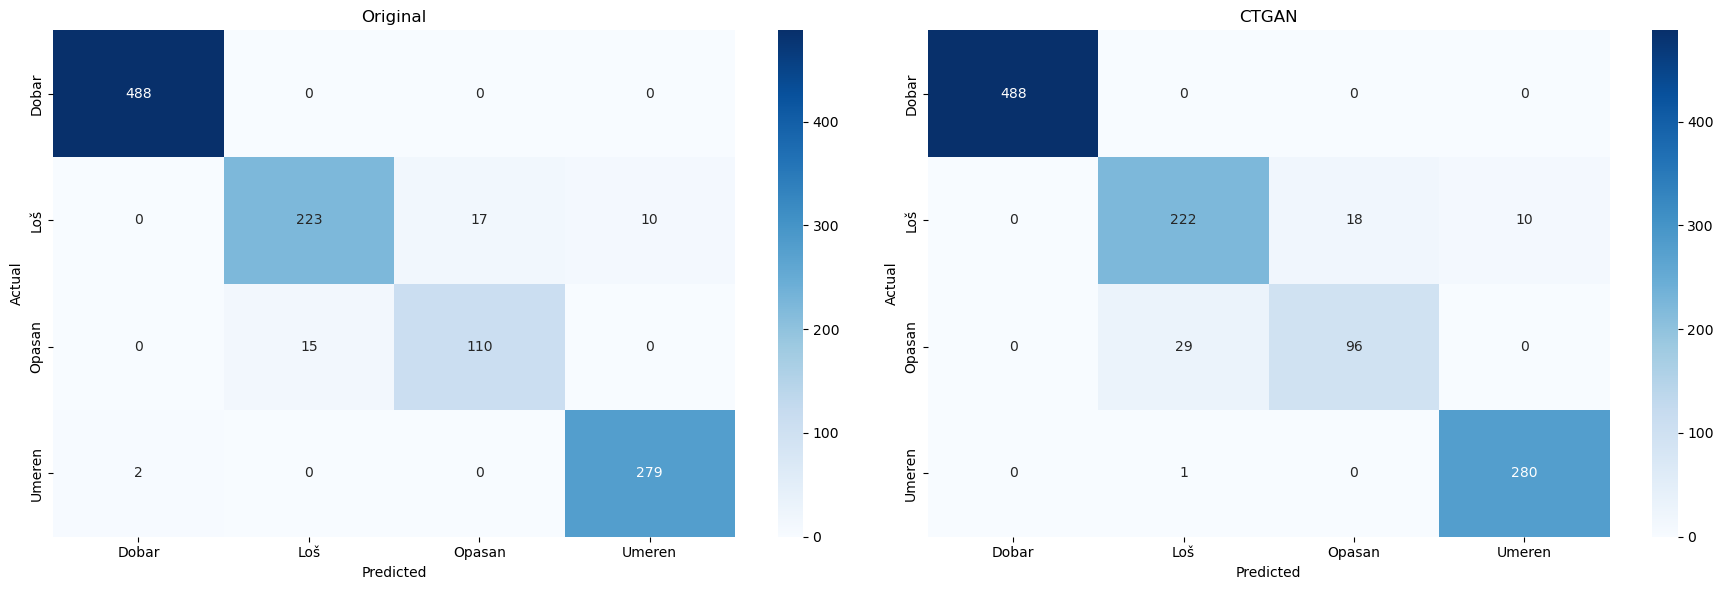

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Original","CTGAN"]
conf_matrices = [conf_matrixs_catboost[0][1],conf_matrix_catboost_ctgan]

for idx, (title, conf_matrix) in enumerate(zip(titles, conf_matrices)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

features_train_aug = df_train_aug.drop('Kvalitet_Vazduha', axis=1)
target_train_aug = df_train_aug['Kvalitet_Vazduha']

features_train_aug_std = pd.DataFrame(
    StandardScaler().fit_transform(features_train_aug),
    columns=features_train_aug.columns,
    index=features_train_aug.index
)

model = SVC(kernel='rbf', decision_function_shape='ovo')
model.fit(features_train_aug_std, target_train_aug)

features_test_std = pd.DataFrame(
    StandardScaler().fit_transform(features_test),
    columns=features_test.columns,
    index=features_test.index
)

target_pred = model.predict(features_test_std)
report_svm_ctgan = createTableReport(
    classification_report(target_test, target_pred, target_names=encoder.classes_, output_dict=True)
)
conf_matrix_svm_ctgan = createConfusionMatrix(target_test, target_pred, show_plot=False)

In [96]:
showReports(dfs=[reports_svm[1],report_svm_ctgan],titles=['Original','CTGAN'])

,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.894309,0.880000,0.887097,250.0
Opasan,0.865546,0.824000,0.844262,125.0
Umeren,0.951389,0.975089,0.963093,281.0
macro avg,0.926284,0.919772,0.922847,1144.0
weighted avg,0.947665,0.948427,0.947938,1144.0
accuracy,NaN,NaN,0.948427,NaN
,precision,recall,f1-score,support
Dobar,1.000000,0.983607,0.991736,488.0
Loš,0.765432,0.744000,0.754564,250.0


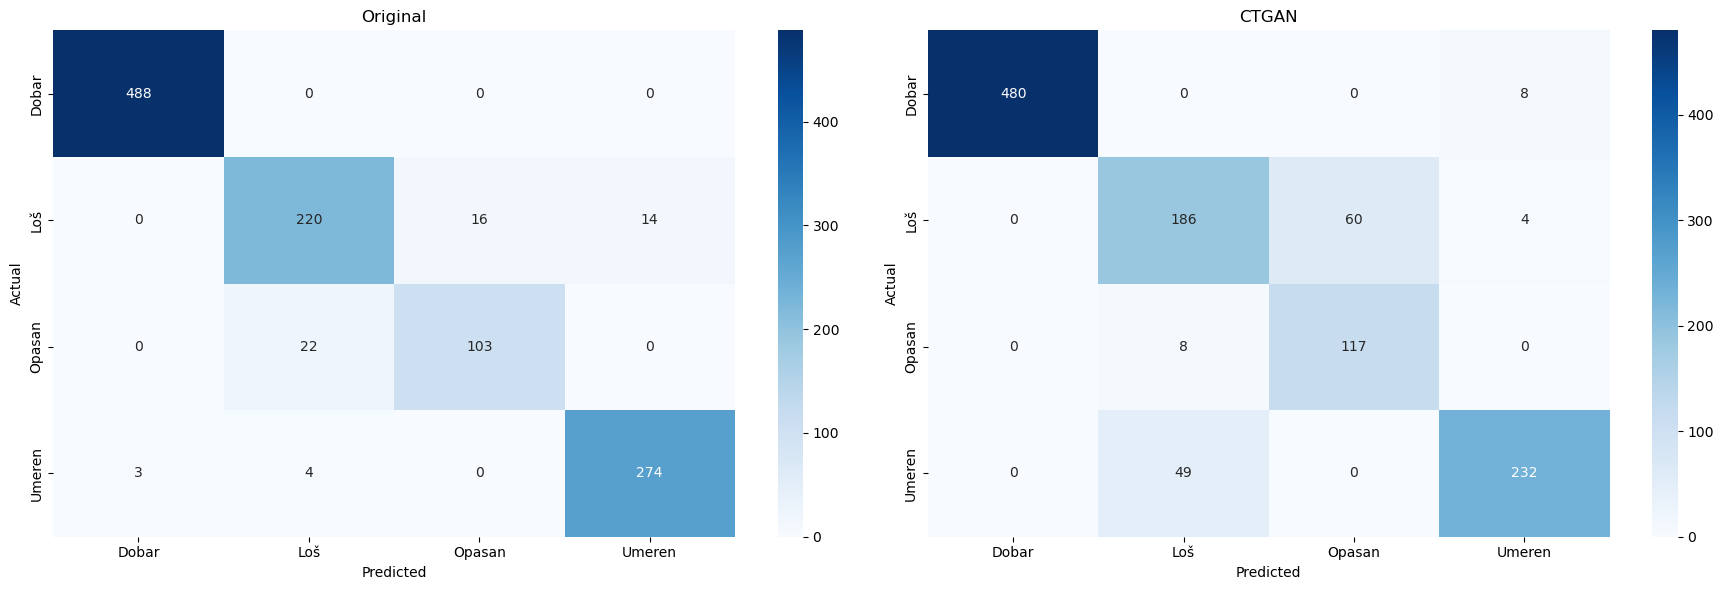

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

titles = ["Original","CTGAN"]
conf_matrices = [conf_matrixs_svm[1][1],conf_matrix_svm_ctgan] 

for idx, (title, conf_matrix) in enumerate(zip(titles, conf_matrices)):
    seaborn.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Primena CTGAN metoda proširenja skupa podataka nije rezultovala boljom predikcijom. Izuzev predikcije klase "Opasan" koja malo bolja, ostale klase su imale lošiji rezultat, čime je celokupno preciznost modela smanjena.